In [112]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import particle
import ROOT
import numpy as np
import sys
import pandas as pd
import glob
sys.path.append('/storage/gpfs_data/neutrino/users/gi/sand-physics/notebook/python_tools')
from ROOT_tools import ROOT_tools
from MultiPlotter import MultiPlotter
from ROOT2Pandas import Converter
from SampleManager import Sample, Manager
tool = ROOT_tools()

In [113]:
folder = "/storage/gpfs_data/neutrino/users/gi/sand-physics/production_antinumucc/FV_Signal"
production = glob.glob(f"{folder}/*analysed.root")
production

['/storage/gpfs_data/neutrino/users/gi/sand-physics/production_antinumucc/FV_Signal/events-in-SANDtracker.1300.to.1400.ecal-digit.analysed.root',
 '/storage/gpfs_data/neutrino/users/gi/sand-physics/production_antinumucc/FV_Signal/events-in-SANDtracker.0.to.100.ecal-digit.analysed.root',
 '/storage/gpfs_data/neutrino/users/gi/sand-physics/production_antinumucc/FV_Signal/events-in-SANDtracker.800.to.900.ecal-digit.analysed.root',
 '/storage/gpfs_data/neutrino/users/gi/sand-physics/production_antinumucc/FV_Signal/events-in-SANDtracker.1600.to.1700.ecal-digit.analysed.root',
 '/storage/gpfs_data/neutrino/users/gi/sand-physics/production_antinumucc/FV_Signal/events-in-SANDtracker.400.to.500.ecal-digit.analysed.root',
 '/storage/gpfs_data/neutrino/users/gi/sand-physics/production_antinumucc/FV_Signal/events-in-SANDtracker.1400.to.1500.ecal-digit.analysed.root',
 '/storage/gpfs_data/neutrino/users/gi/sand-physics/production_antinumucc/FV_Signal/events-in-SANDtracker.900.to.1000.ecal-digit.ana

In [114]:
converter = Converter(production, "digit_extended")

In [115]:
columns_df = ['FileName',
              'EventType',
              'CCQEonHydrogen',
              'Interaction_vtxX',
              'Interaction_vtxY',
              'Interaction_vtxZ',
              'InteractionTarget',
              'InteractionVolume_short',
              'PrimaryStateHadronicSystemTopology_name',
              'NofFinalStateChargedParticles',
              'PrimaryStateHadronicSystemTotalKinE',
              'MissingTransverseMomentum',
              'ExpectedHadronSystP3',
              "event_has_candidate",
 ]

columns_primaries = ['FileName',
                      'EventType',
                      'CCQEonHydrogen',
                      'Interaction_vtxX',
                      'Interaction_vtxY',
                      'Interaction_vtxZ',
                      'Interaction_vtxT',
                      'PrimariesPDG',
                      'PrimariesTrackId',
                      'PrimariesP4',
                      'PrimariesBeta',
                      'PrimariesEDepECAL',
                      'PrimariesEmissionAngle',
                      'DeviationAngle',
                      ]

columns_fired_cells = ['FileName',
                       'CCQEonHydrogen',
                       'Fired_Cells_mod',
                       'Fired_Cells_id',
                       'Fired_Cells_x',
                       'Fired_Cells_y',
                       'Fired_Cells_z',
                       'isCellComplete',
                       'Fired_Cells_adc1',
                       'Fired_Cells_tdc1',
                       'Fired_Cells_adc2',
                       'Fired_Cells_tdc2',
                       'Fired_Cell_true_hit1',
                       'Fired_Cell_true_hit2',
                        "Fired_by_primary_neutron",
                        "Fired_by_primary_antimu",
                        "Fired_Cell_true_Hit_x",
                        "Fired_Cell_true_Hit_y",
                        "Fired_Cell_true_Hit_z",
                        "Fired_Cell_true_Hit_t",
                        #
                        "ExpectedNeutron_HitPosition_x",
                        "ExpectedNeutron_HitPosition_y",
                        "ExpectedNeutron_HitPosition_z",
                        #
                        "Reconstructed_HitPosition_x",
                        "Reconstructed_HitPosition_y",
                        "Reconstructed_HitPosition_z",
                        "Reconstructed_HitPoistion_w",
                        "Reconstructed_HitTime",
                    #     "True_FlightLength",
                    #     "ExpectedNeutron_FlightLength",
                    #     "Reconstructed_FlightLength",
                    #     "Reconstructed_Beta",
                    #     "Reconstructed_neutronKin_MeV",
                        "IsEarliestCell",
                        #
                    #     "Residuals_HitSpace",
                        "IsCompatible",
                        "isCandidate",
                    #     "event_has_candidate",
                    #     "Reconstructed_MissingPT",
                        ]

columns_trj = [
     "FileName",
     "trackid",
     "pdg",
     "point_x",
     "point_y",
     "point_z",
     "point_px",
     "point_py",
     "point_pz",
     "process",
]

In [116]:
primaries = converter.CreatePandas(
    columns = columns_primaries,
    rename = True,
    indices = ['FileName', 'PrimariesTrackId']
)
primaries

DataFrame from file /storage/gpfs_data/neutrino/users/gi/sand-physics/production_antinumucc/FV_Signal/events-in-SANDtracker.1300.to.1400.ecal-digit.analysed.root has MultiIndex structure, keeping entry and subentry as columns
DataFrame from file /storage/gpfs_data/neutrino/users/gi/sand-physics/production_antinumucc/FV_Signal/events-in-SANDtracker.0.to.100.ecal-digit.analysed.root has MultiIndex structure, keeping entry and subentry as columns
DataFrame from file /storage/gpfs_data/neutrino/users/gi/sand-physics/production_antinumucc/FV_Signal/events-in-SANDtracker.800.to.900.ecal-digit.analysed.root has MultiIndex structure, keeping entry and subentry as columns
DataFrame from file /storage/gpfs_data/neutrino/users/gi/sand-physics/production_antinumucc/FV_Signal/events-in-SANDtracker.1600.to.1700.ecal-digit.analysed.root has MultiIndex structure, keeping entry and subentry as columns
DataFrame from file /storage/gpfs_data/neutrino/users/gi/sand-physics/production_antinumucc/FV_Signal/

entry  \
FileName                                           PrimariesTrackId subentry          
events-in-SANDtracker.1300.gtrac.root:gRooTrack... 0                0             0   
                                                   1                1             0   
events-in-SANDtracker.1300.gtrac.root:gRooTrack... 0                0             1   
                                                   1                1             1   
events-in-SANDtracker.1300.gtrac.root:gRooTrack... 0                0             2   
...                                                                             ...   
events-in-SANDtracker.399.gtrac.root:gRooTracke... 1                1          2946   
events-in-SANDtracker.399.gtrac.root:gRooTracke... 0                0          2947   
                                                   1                1          2947   
events-in-SANDtracker.399.gtrac.root:gRooTracke... 0                0          2948   
                                                   1                1          2948   

                                                                             EventType  \
FileName                                           PrimariesTrackId subentry             
events-in-SANDtracker.1300.gtrac.root:gRooTrack... 0                0              QES   
                                                   1                1              QES   
events-in-SANDtracker.1300.gtrac.root:gRooTrack... 0                0              QES   
                                                   1                1              QES   
events-in-SANDtracker.1300.gtrac.root:gRooTrack... 0                0              QES   
...                                                                                ...   
events-in-SANDtracker.399.gtrac.root:gRooTracke... 1                1              QES   
events-in-SANDtracker.399.gtrac.root:gRooTracke... 0                0              QES   
                                                   1                1              QES   
events-in-SANDtracker.399.gtrac.root:gRooTracke... 0                0              QES   
                                                   1                1              QES   

                                                                              CCQEonHydrogen  \
FileName                                           PrimariesTrackId subentry                   
events-in-SANDtracker.1300.gtrac.root:gRooTrack... 0                0                      1   
                                                   1                1                      1   
events-in-SANDtracker.1300.gtrac.root:gRooTrack... 0                0                      1   
                                                   1                1                      1   
events-in-SANDtracker.1300.gtrac.root:gRooTrack... 0                0                      1   
...                                                                                      ...   
events-in-SANDtracker.399.gtrac.root:gRooTracke... 1                1                      1   
events-in-SANDtracker.399.gtrac.root:gRooTracke... 0                0                      1   
                                                   1                1                      1   
events-in-SANDtracker.399.gtrac.root:gRooTracke... 0                0                      1   
                                                   1                1                      1   

                                                                              Interaction_vtxX  \
FileName                                           PrimariesTrackId subentry                     
events-in-SANDtracker.1300.gtrac.root:gRooTrack... 0                0                 1.394878   
                                                   1                1                 1.394878   
events-in-SANDtracker.1300.gtrac.root:gRooTrack... 0                0                 1.001212   
                                    

In [117]:
df = converter.CreatePandas(
    columns = columns_df,
    rename = False,
    indices = ['FileName']
)
df

,EventType,CCQEonHydrogen,Interaction_vtxX,Interaction_vtxY,Interaction_vtxZ,InteractionTarget,InteractionVolume_short,PrimaryStateHadronicSystemTopology_name,NofFinalStateChargedParticles,PrimaryStateHadronicSystemTotalKinE,MissingTransverseMomentum,ExpectedHadronSystP3fX,ExpectedHadronSystP3fY,ExpectedHadronSystP3fZ,event_has_candidate
FileName,,,,,,,,,,,,,,,
events-in-SANDtracker.1300.gtrac.root:gRooTracker:46,QES,1,1.394878,-2.893775,25.619472,proton,C3H6_Target,n,1,0.311857,0.000000e+00,-0.508062,0.448156,0.473614,0
events-in-SANDtracker.1300.gtrac.root:gRooTracker:114,QES,1,1.001212,-4.025261,23.429020,proton,C3H6_Target,n,1,0.005699,1.962616e-17,-0.070079,-0.075773,0.009458,0
events-in-SANDtracker.1300.gtrac.root:gRooTracker:153,QES,1,0.644764,-3.333212,25.289135,proton,C3H6_Target,n,1,0.075012,5.064917e-16,0.293461,0.212385,0.123931,0
events-in-SANDtracker.1300.gtrac.root:gRooTracker:211,QES,1,1.427489,-1.904834,24.485959,proton,C3H6_Target,n,1,0.215781,4.996004e-16,-0.481508,0.303270,0.358084,0
events-in-SANDtracker.1300.gtrac.root:gRooTracker:261,QES,1,-0.085514,-1.429869,23.392709,proton,C3H6_Target,n,1,0.999145,4.965068e-16,1.096516,-0.767891,1.041073,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
events-in-SANDtracker.399.gtrac.root:gRooTracker:625,QES,1,-0.495264,-2.054954,23.863672,proton,C3H6_Target,n,1,0.037970,6.938894e-17,0.036320,0.245561,0.105703,0
events-in-SANDtracker.399.gtrac.root:gRooTracker:780,QES,1,-1.411492,-2.293473,24.628722,proton,C3H6_Target,n,1,0.287490,2.775558e-16,0.002408,-0.649449,0.448442,0
events-in-SANDtracker.399.gtrac.root:gRooTracker:813,QES,1,-0.910867,-3.862516,23.429467,proton,C3H6_Target,n,1,0.073592,1.333424e-15,0.188910,-0.324625,0.051348,0


In [118]:
fired_cells = converter.CreatePandas(
    columns = columns_fired_cells,
    rename = True,
    indices = ['FileName','Fired_Cells_id']
)
fired_cells

DataFrame from file /storage/gpfs_data/neutrino/users/gi/sand-physics/production_antinumucc/FV_Signal/events-in-SANDtracker.1300.to.1400.ecal-digit.analysed.root has MultiIndex structure, keeping entry and subentry as columns
DataFrame from file /storage/gpfs_data/neutrino/users/gi/sand-physics/production_antinumucc/FV_Signal/events-in-SANDtracker.0.to.100.ecal-digit.analysed.root has MultiIndex structure, keeping entry and subentry as columns
DataFrame from file /storage/gpfs_data/neutrino/users/gi/sand-physics/production_antinumucc/FV_Signal/events-in-SANDtracker.800.to.900.ecal-digit.analysed.root has MultiIndex structure, keeping entry and subentry as columns
DataFrame from file /storage/gpfs_data/neutrino/users/gi/sand-physics/production_antinumucc/FV_Signal/events-in-SANDtracker.1600.to.1700.ecal-digit.analysed.root has MultiIndex structure, keeping entry and subentry as columns
DataFrame from file /storage/gpfs_data/neutrino/users/gi/sand-physics/production_antinumucc/FV_Signal/

entry  \
FileName                                           Fired_Cells_id subentry          
events-in-SANDtracker.1300.gtrac.root:gRooTrack... 215403         0             0   
                                                   215404         1             0   
                                                   217004         2             0   
                                                   217104         3             0   
                                                   217204         4             0   
...                                                                           ...   
events-in-SANDtracker.399.gtrac.root:gRooTracke... 219011         2          2948   
                                                   219111         3          2948   
                                                   219210         4          2948   
                                                   219310         5          2948   
                                                   219410         6          2948   

                                                                            CCQEonHydrogen  \
FileName                                           Fired_Cells_id subentry                   
events-in-SANDtracker.1300.gtrac.root:gRooTrack... 215403         0                      1   
                                                   215404         1                      1   
                                                   217004         2                      1   
                                                   217104         3                      1   
                                                   217204         4                      1   
...                                                                                    ...   
events-in-SANDtracker.399.gtrac.root:gRooTracke... 219011         2                      1   
                                                   219111         3                      1   
                                                   219210         4                      1   
                                                   219310         5                      1   
                                                   219410         6                      1   

                                                                            Fired_Cells_mod  \
FileName                                           Fired_Cells_id subentry                    
events-in-SANDtracker.1300.gtrac.root:gRooTrack... 215403         0                      15   
                                                   215404         1                      15   
                                                   217004         2                      17   
                                                   217104         3                      17   
                                                   217204         4                      17   
...                                                                                     ...   
events-in-SANDtracker.399.gtrac.root:gRooTracke... 219011         2                      19   
                                                   219111         3                      19   
                                                   219210         4                      19   
                                                   219310         5                      19   
                                                   219410         6                      19   

                                                                            Fired_Cells_x  \
FileName                                           Fired_Cells_id subentry                  
events-in-SANDtracker.1300.gtrac.root:gRooTrack... 215403         0         -3.320746e-13   
                                                   215404         1         -3.320746e-13   
                                                   217004         2         -1.215477e-13   
                                              

Confusion Matrix:
[[    0     0]
 [32335  1172]]


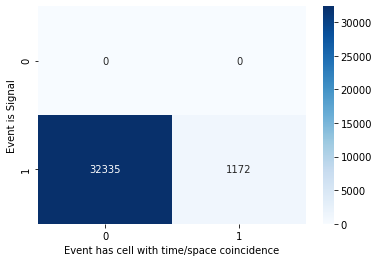

In [10]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(df.dropna()['CCQEonHydrogen'], df.dropna()['event_has_candidate'])

# Stampa la confusion matrix
print("Confusion Matrix:")
print(cm)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['0', '1'], 
            yticklabels=['0', '1'])
plt.title("")
plt.ylabel('Event is Signal')
plt.xlabel('Event has cell with time/space coincidence')
plt.show()

In [8]:
primaries['HasChangedDirection'] = primaries.apply(
    lambda row: 1 if abs(row['DeviationAngle']) < 0.01 else (np.nan if row['DeviationAngle'] == -999 else 0),
    axis=1
)

In [119]:
df_manager = Manager(df, "df", reference_index="FileName")
primaries_manager = Manager(primaries, "primaries", reference_index="FileName")
fired_cells_manager = Manager(fired_cells, "fired_cells", reference_index="FileName")

# Samples

In [120]:
df_manager.DefineSample("signal", "CCQEonHydrogen==1")
df_manager.DefineSample("true_positive", "CCQEonHydrogen==1 & event_has_candidate==1")
df_manager.DefineSample("false_positive", "CCQEonHydrogen==0 & event_has_candidate==1")
df_manager.DefineSample("true_negative", "CCQEonHydrogen==0 & event_has_candidate==0")
df_manager.DefineSample("false_negative", "CCQEonHydrogen==1 & event_has_candidate==0")

primaries_manager.DefineSample("signal",                              "CCQEonHydrogen==1")
primaries_manager.DefineSample("signal_mu+",                          "CCQEonHydrogen==1 & PrimariesPDG==-13")
primaries_manager.DefineSample("signal_neutrons",                     "CCQEonHydrogen==1 & PrimariesPDG==2112")

fired_cells_manager.DefineSample("complete_fired",                    "isCellComplete==1")
fired_cells_manager.DefineSample("complete_fired_by_neutron",         "isCellComplete==1 & Fired_by_primary_neutron==1")
fired_cells_manager.DefineSample("complete_fired_by_signal_neutron",  "CCQEonHydrogen==1 & isCellComplete==1 & Fired_by_primary_neutron==1")
fired_cells_manager.DefineSample("fired_by_signal_neutron",           "CCQEonHydrogen==1 & Fired_by_primary_neutron==1")
fired_cells_manager.DefineSample("complete_fired_by_antimu",          "isCellComplete==1 & Fired_by_primary_antimu==1")
fired_cells_manager.DefineSample("complete_fired_by_signal_antimu",   "isCellComplete==1 & Fired_by_primary_antimu==1")

# fired_cells_manager.DefineSample("isCandidate",                       "isCandidate==1")
# fired_cells_manager.DefineSample("isFakeCandidate",                   "isCandidate==1 & CCQEonHydrogen==0")
# fired_cells_manager.DefineSample("isTrueCandidate",                   "isCandidate==1 & CCQEonHydrogen==1")

# primaries_manager.CombineSamples("signal_neutrons", 
#                                  fired_cells_manager,
#                                  "complete_fired_by_neutron",
#                                  "signal_neutrons_reconstructable_complete") # name combined sample



In [126]:
signal_events                               = df_manager.GetSample("signal")

signal_antimuons                            = primaries_manager.GetSample("signal_mu+")
signal_neutrons                             = primaries_manager.GetSample("signal_neutrons")

neutron_mass = 939.565 # MeV
signal_neutrons.dataframe['E_kin'] = signal_neutrons.dataframe.PrimariesP4_t - neutron_mass

complete_cells                              = fired_cells_manager.GetSample("complete_fired")
# candidate_cells                             = fired_cells_manager.GetSample("isCandidate")
complete_fired_by_neutron                   = fired_cells_manager.GetSample("complete_fired_by_neutron")
complete_fired_by_signal_neutron            = fired_cells_manager.GetSample("complete_fired_by_signal_neutron") 
fired_by_signal_neutron                     = fired_cells_manager.GetSample("fired_by_signal_neutron") 
complete_fired_by_signal_antimu             = fired_cells_manager.GetSample("complete_fired_by_signal_antimu")
fired_by_antimuons                          = fired_cells_manager.GetSample("complete_fired_by_antimu")

# events_false_positive                       = df_manager.GetSample("false_positive") 
# events_false_negative                       = df_manager.GetSample("false_negative") 

/home/NEUTRINO/gianfrancoingratta/.local/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [127]:
id_events_w_cells_fired_by_signal_neutron = fired_by_signal_neutron.dataframe.index.get_level_values(0).unique()
id_events_w_complete_cells_fired_by_signal_neutron = complete_fired_by_signal_neutron.dataframe.index.get_level_values(0).unique()

signal_neutrons.dataframe["is_detected"] =  signal_neutrons.dataframe.index.get_level_values(0).isin(id_events_w_cells_fired_by_signal_neutron)
signal_neutrons.dataframe["is_detected_and_complete"] =  signal_neutrons.dataframe.index.get_level_values(0).isin(id_events_w_complete_cells_fired_by_signal_neutron)
complete_fired_by_signal_neutron = complete_fired_by_signal_neutron.dataframe.merge(signal_neutrons.dataframe['E_kin'], on='FileName',how='left')
complete_fired_by_signal_neutron = complete_fired_by_signal_neutron.rename(columns={"E_kin":"E_kin_neutron"})

/home/NEUTRINO/gianfrancoingratta/.local/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/home/NEUTRINO/gianfrancoingratta/.local/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [128]:
def GetRelation(df, x_variable, y_variable, nof_bins = 8):
    x_mean, y_mean = [], []
    # sort by x_variable and slice dataframe in chankes
    for sub_df in np.array_split(df.sort_values(x_variable), nof_bins):
        x_mean.append(np.mean(sub_df[x_variable]))
        if(y_variable=='t_hit_res'):
            res = abs((sub_df.Fired_Cell_true_Hit_t - sub_df.Reconstructed_HitTime)/(sub_df.Reconstructed_HitTime))
            y_mean.append(np.mean(res))
        else:
            y_mean.append(np.mean(sub_df[y_variable]))
    return (x_mean, y_mean) 

In [144]:
kinE_vs_detection_eff = GetRelation(signal_neutrons.dataframe, 'E_kin', 'is_detected')
kinE_vs_resolution = GetRelation(complete_fired_by_signal_neutron, 'E_kin_neutron', 't_hit_res', 5)
t_hit_true_vs_resolution = GetRelation(complete_fired_by_signal_neutron, 'Fired_Cell_true_Hit_t', 't_hit_res')
# kinE_vs_t_hit_true = GetRelation(complete_fired_by_signal_neutron, 'E_kin_neutron', 'Fired_Cell_true_Hit_t', 3)

Neutron True Kinetic energy and tof (signal event)


Text(0, 0.5, 'detection efficiency')

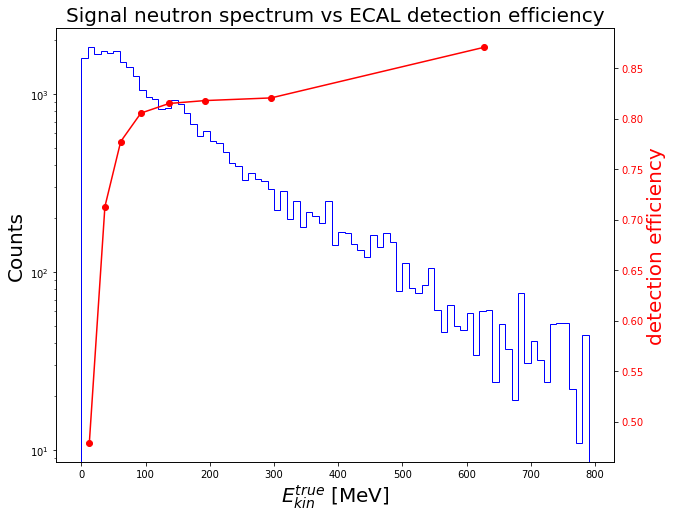

In [130]:
print("Neutron True Kinetic energy and tof (signal event)")
plotter = MultiPlotter(nrows=1, ncols=1, figsize=(10, 8))
# First histogram: Neutron True Kinetic Energy
plotter.plot_hist(
    data = signal_neutrons.dataframe['E_kin'],
    bins = np.arange(0, 800, 10),
    color = 'blue',
    xlabel = r"$E_{kin}^{true}$ [MeV]",
    ylabel = "Counts",
    log_scale = True
)

plotter.axes[0].set_title("Signal neutron spectrum vs ECAL detection efficiency", fontsize=20)
ax1 = plotter.axes[plotter.current_ax]
ax2 = ax1.twinx()

ax2.plot(kinE_vs_detection_eff[0], kinE_vs_detection_eff[1], marker='o', linestyle='-', color='r')
ax2.tick_params(axis='y', labelcolor='r')
ax2.set_ylabel('detection efficiency', color='r', fontsize=20)


(0.0, 80.0)

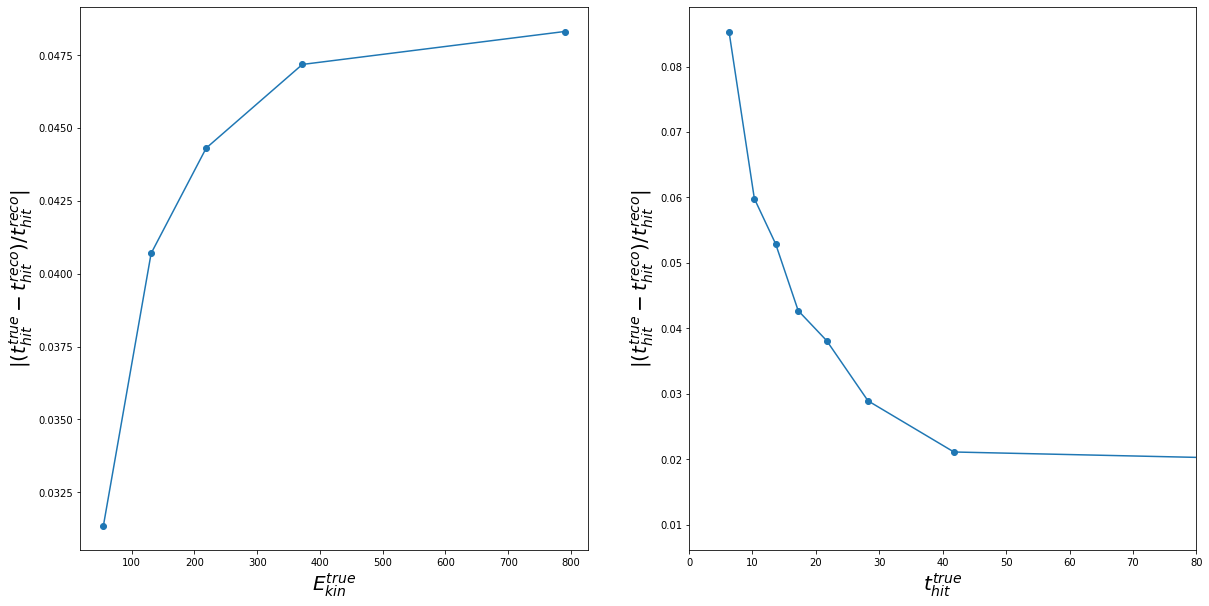

In [146]:
plotter = MultiPlotter(nrows=1, ncols=2, figsize=(20, 10))

plotter.axes[plotter.current_ax].plot(kinE_vs_resolution[0], kinE_vs_resolution[1], marker='o', linestyle='-')
plotter.axes[plotter.current_ax].set_xlabel(r"$E_{kin}^{true}$", fontsize=20)
plotter.axes[plotter.current_ax].set_ylabel(r"$|(t_{hit}^{true} - t_{hit}^{reco})/t_{hit}^{reco}|$", fontsize=20)

plotter.next_plot()

plotter.axes[plotter.current_ax].plot(t_hit_true_vs_resolution[0], t_hit_true_vs_resolution[1], marker='o', linestyle='-')
plotter.axes[plotter.current_ax].set_xlabel(r"$t_{hit}^{true}$", fontsize=20)
plotter.axes[plotter.current_ax].set_ylabel(r"$|(t_{hit}^{true} - t_{hit}^{reco})/t_{hit}^{reco}|$", fontsize=20)
plotter.axes[plotter.current_ax].set_xlim((0,80))

# plotter.next_plot()

# plotter.axes[plotter.current_ax].plot(kinE_vs_t_hit_true[0], kinE_vs_t_hit_true[1], marker='o', linestyle='-')
# plotter.axes[plotter.current_ax].set_xlabel(r"$E_{kin}^{true}$", fontsize=20)
# plotter.axes[plotter.current_ax].set_ylabel(r"$t_{hit}^{true}$", fontsize=20)

fwhm_x is :0.8772845953002615
Unknown function: crystal ball


Warning in <TROOT::Append>: Replacing existing TH1:  time:1728057031 (Potential memory leak).
Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas_name


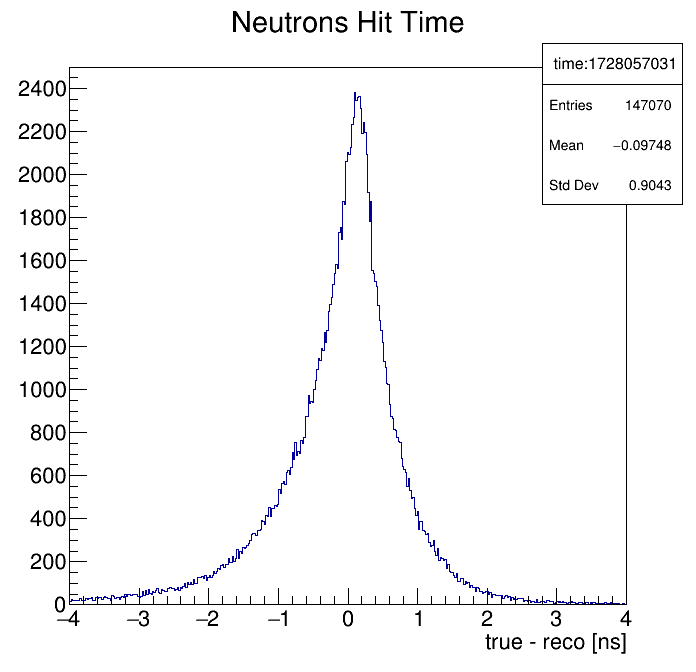

In [159]:
residuals_x = tool.FillTH1D(
                          iterable = complete_fired_by_signal_neutron['Fired_Cell_true_Hit_t'] - (complete_fired_by_signal_neutron['Reconstructed_HitTime']), 
                          histogram_name = "", 
                          title = "Neutrons Hit Time; true - reco [ns]", 
                          nbins = int(np.sqrt(len(complete_fired_by_signal_neutron['Fired_Cell_true_hit1_t']))),
                          #  nbins = 30,
                          x_min = -4, 
                          x_max = 4)

residuals_x = tool.FillTH1D(
                          iterable = complete_fired_by_signal_neutron['Fired_Cell_true_Hit_t'] - (complete_fired_by_signal_neutron['Reconstructed_HitTime']), 
                          histogram_name = "", 
                          title = "Neutrons Hit Time; true - reco [ns]", 
                          nbins = int(np.sqrt(len(complete_fired_by_signal_neutron['Fired_Cell_true_hit1_t']))),
                          #  nbins = 30,
                          x_min = -4, 
                          x_max = 4)

# residuals_x, mean_res_x, sigma_res_x, err_mean, err_sigma = tool.FitTH1D_w_gauss(hist = residuals_x, 
#                                              gauss_range = (-3, 1) ,
#                                              fit_range = (-1.5,0)
#                                              )
# landau = ROOT.TF1("gaussian_func", "gaus", -3, 1)

residuals_x.Fit("crystal ball")

bin1_x = residuals_x.FindFirstBinAbove(residuals_x.GetMaximum()/2)
bin2_x = residuals_x.FindLastBinAbove(residuals_x.GetMaximum()/2)
fwhm_x = residuals_x.GetBinCenter(bin2_x) - residuals_x.GetBinCenter(bin1_x)


print(f"fwhm_x is :{fwhm_x}")
# print(f"fwhm_y is :{fwhm_y}")


c = ROOT.TCanvas("canvas_name", "Canvas", 700, 700)
# c.Divide(2)

# c.cd(1)
ROOT.gStyle.SetOptFit(1011)
residuals_x.Draw()
c.Draw()


fwhm_x is :0.3265306122448983


Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas_name


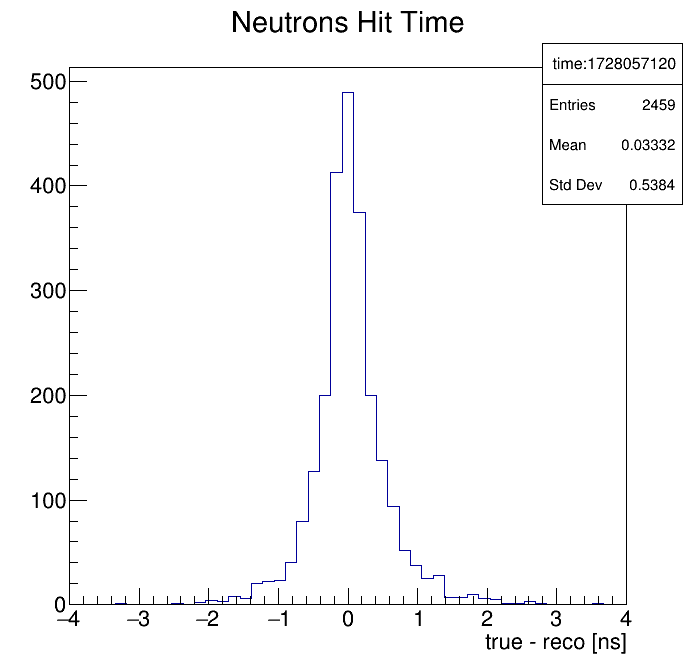

In [162]:
residuals_x = tool.FillTH1D(
                          iterable = complete_fired_by_signal_neutron.query("IsEarliestCell==1")['Fired_Cell_true_Hit_t'] - (complete_fired_by_signal_neutron.query("IsEarliestCell==1")['Reconstructed_HitTime']+0.2), 
                          histogram_name = "", 
                          title = "Neutrons Hit Time; true - reco [ns]", 
                          nbins = int(np.sqrt(len(complete_fired_by_signal_neutron.query("IsEarliestCell==1")['Fired_Cell_true_hit1_t']))),
                          #  nbins = 30,
                          x_min = -4, 
                          x_max = 4)

# residuals_x, mean_res_x, sigma_res_x, err_mean, err_sigma = tool.FitTH1D_w_gauss(hist = residuals_x, 
#                                              gauss_range = (-3, 1) ,
#                                              fit_range = (-1.5,0)
#                                              )
# landau = ROOT.TF1("gaussian_func", "gaus", -3, 1)

bin1_x = residuals_x.FindFirstBinAbove(residuals_x.GetMaximum()/2)
bin2_x = residuals_x.FindLastBinAbove(residuals_x.GetMaximum()/2)
fwhm_x = residuals_x.GetBinCenter(bin2_x) - residuals_x.GetBinCenter(bin1_x)


print(f"fwhm_x is :{fwhm_x}")
# print(f"fwhm_y is :{fwhm_y}")


c = ROOT.TCanvas("canvas_name", "Canvas", 700, 700)
# c.Divide(2)

# c.cd(1)
ROOT.gStyle.SetOptFit(1011)
residuals_x.Draw()
c.Draw()

In [16]:
complete_fired_by_signal_neutron.dataframe.columns

Index(['entry', 'CCQEonHydrogen', 'EventId', 'Fired_Cells_mod',
       'Fired_Cells_x', 'Fired_Cells_y', 'Fired_Cells_z', 'isCellComplete',
       'Fired_Cells_adc1', 'Fired_Cells_tdc1', 'Fired_Cells_adc2',
       'Fired_Cells_tdc2', 'Fired_Cell_true_hit1_x', 'Fired_Cell_true_hit1_y',
       'Fired_Cell_true_hit1_z', 'Fired_Cell_true_hit1_t',
       'Fired_Cell_true_hit2_x', 'Fired_Cell_true_hit2_y',
       'Fired_Cell_true_hit2_z', 'Fired_Cell_true_hit2_t',
       'Fired_by_primary_neutron', 'Fired_by_primary_antimu',
       'Fired_Cell_true_Hit_x', 'Fired_Cell_true_Hit_y',
       'Fired_Cell_true_Hit_z', 'Fired_Cell_true_Hit_t',
       'ExpectedNeutron_HitPosition_x', 'ExpectedNeutron_HitPosition_y',
       'ExpectedNeutron_HitPosition_z', 'Reconstructed_HitPosition_x',
       'Reconstructed_HitPosition_y', 'Reconstructed_HitPosition_z',
       'Reconstructed_HitTime', 'True_FlightLength',
       'ExpectedNeutron_FlightLength', 'Reconstructed_FlightLength',
       'Reconstructed_Beta

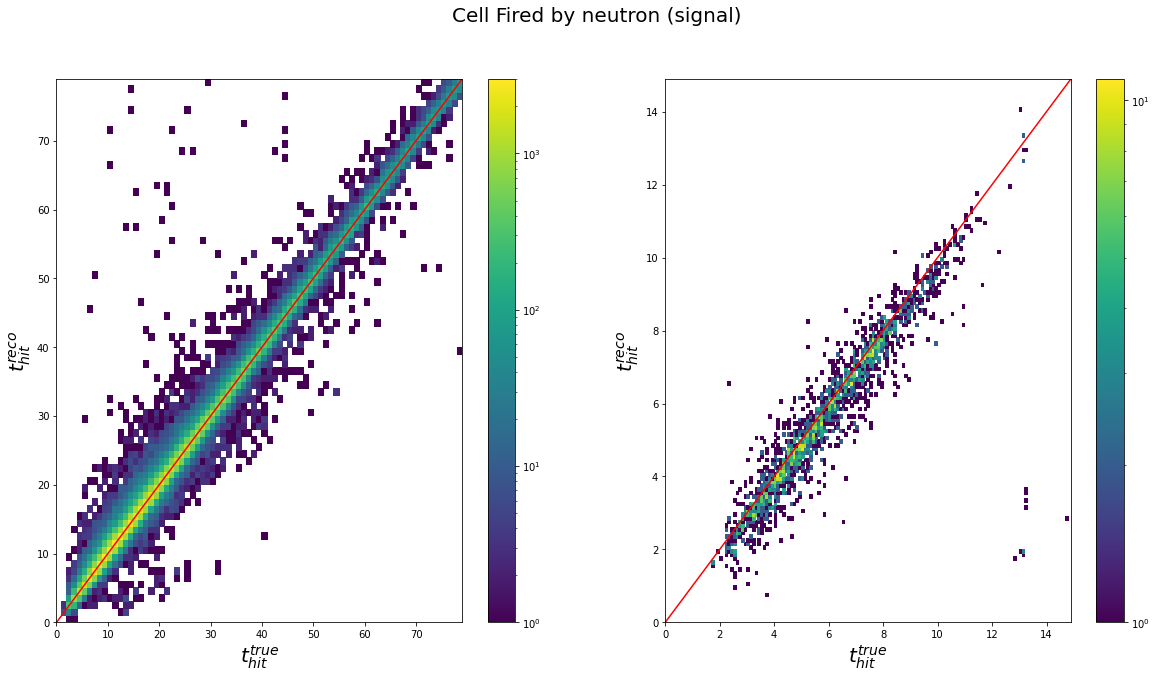

In [167]:
plotter = MultiPlotter(nrows=1, ncols=2, figsize=(20, 10), suptitle="Cell Fired by neutron (signal)")

plotter.plot_hist2d(
    x = complete_fired_by_signal_neutron["Fired_Cell_true_Hit_t"],
    y = complete_fired_by_signal_neutron["Reconstructed_HitTime"],
    bins_x = np.arange(0,80,1),
    bins_y = np.arange(0,80,1),
    xlabel = r"$t_{hit}^{true}$",
    ylabel = r"$t_{hit}^{reco}$",
    log_scale = True
)
plotter.axes[plotter.current_ax].plot([0,80],[0,80],color='red')

plotter.next_plot()

plotter.plot_hist2d(
    x = complete_fired_by_signal_neutron.query("IsEarliestCell==1")["Fired_Cell_true_Hit_t"],
    y = complete_fired_by_signal_neutron.query("IsEarliestCell==1")["Reconstructed_HitTime"],
    bins_x = np.arange(0,15,0.1),
    bins_y = np.arange(0,15,0.1),
    xlabel = r"$t_{hit}^{true}$",
    ylabel = r"$t_{hit}^{reco}$",
    log_scale = True
)
plotter.axes[plotter.current_ax].plot([0,80],[0,80],color='red')

In [32]:
complete_fired_by_signal_neutron.dataframe.columns

Index(['entry', 'CCQEonHydrogen', 'EventId', 'Fired_Cells_mod',
       'Fired_Cells_x', 'Fired_Cells_y', 'Fired_Cells_z', 'isCellComplete',
       'Fired_Cells_adc1', 'Fired_Cells_tdc1', 'Fired_Cells_adc2',
       'Fired_Cells_tdc2', 'Fired_Cell_true_hit1_x', 'Fired_Cell_true_hit1_y',
       'Fired_Cell_true_hit1_z', 'Fired_Cell_true_hit1_t',
       'Fired_Cell_true_hit2_x', 'Fired_Cell_true_hit2_y',
       'Fired_Cell_true_hit2_z', 'Fired_Cell_true_hit2_t',
       'Fired_by_primary_neutron', 'Fired_by_primary_antimu',
       'Fired_Cell_true_Hit_x', 'Fired_Cell_true_Hit_y',
       'Fired_Cell_true_Hit_z', 'Fired_Cell_true_Hit_t',
       'ExpectedNeutron_HitPosition_x', 'ExpectedNeutron_HitPosition_y',
       'ExpectedNeutron_HitPosition_z', 'Reconstructed_HitPosition_x',
       'Reconstructed_HitPosition_y', 'Reconstructed_HitPosition_z',
       'Reconstructed_HitTime', 'True_FlightLength',
       'ExpectedNeutron_FlightLength', 'Reconstructed_FlightLength',
       'Reconstructed_Beta

# what's the best cell to reconstruct neutron beta?

# Candidate cells

- quanti eventi hanno una cella candidata sul numero totale di eventi?

In [29]:
nof_signal_events = len(candidate_cells.dataframe.query("CCQEonHydrogen==1"))
nof_signal_events

1140

In [30]:
nof_bkg_events = len(candidate_cells.dataframe.query("CCQEonHydrogen==0"))
nof_bkg_events

497

In [31]:
nof_signal_events / (nof_signal_events + nof_bkg_events)

0.6963958460598656

In [32]:
df

,EventId,EventType,CCQEonHydrogen,Interaction_vtxX,Interaction_vtxY,Interaction_vtxZ,InteractionTarget,InteractionVolume,PrimaryStateHadronicSystemTopology_name,NofFinalStateChargedParticles,PrimaryStateHadronicSystemTotalKinE,MissingTransverseMomentum,ExpectedHadronSystP3fX,ExpectedHadronSystP3fY,ExpectedHadronSystP3fZ,event_has_candidate,InteractionVolume_short
FileName,,,,,,,,,,,,,,,,,
events-in-SANDtracker.402.gtrac.root:gRooTracker:621,621,QES,1,1.217703,-2.426691,24.487021,proton,C3H6Target_B,n,1,0.071026,5.440730e-16,-0.353454,0.060442,0.099650,1,C3H6_Target
events-in-SANDtracker.403.gtrac.root:gRooTracker:418,418,QES,1,-0.947195,-1.407844,23.865871,proton,C3H6Target_A,n,1,0.125740,2.482534e-16,0.302319,-0.371112,0.151575,1,C3H6_Target
events-in-SANDtracker.403.gtrac.root:gRooTracker:716,716,QES,1,0.001374,-1.752646,23.169331,proton,C3H6Target_C,n,1,0.160241,2.387141e-15,-0.528640,0.112436,0.186254,1,C3H6_Target
events-in-SANDtracker.404.gtrac.root:gRooTracker:302,302,QES,1,-1.314421,-1.416879,25.358233,proton,C3H6Target_X1,n,1,0.191688,6.206335e-16,-0.547682,-0.180753,0.253626,1,C3H6_Target
events-in-SANDtracker.404.gtrac.root:gRooTracker:669,669,QES,1,-1.268015,-3.923159,24.051661,proton,C3H6Target_A,n,1,0.106038,6.131407e-16,0.325927,-0.293714,0.134200,1,C3H6_Target
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
events-in-SANDtracker.596.gtrac.root:gRooTracker:981,981,QES,0,0.410831,-1.691935,23.795510,C12,C3H6Target_A,n,1,0.094865,1.127892e-01,-0.270908,0.162097,0.104808,1,C3H6_Target
events-in-SANDtracker.598.gtrac.root:gRooTracker:950,950,RES,0,-1.452299,-3.417738,23.393433,proton,C3H6Target_B,n + pi0,1,0.921794,4.965068e-16,-0.860334,0.388525,0.897599,1,C3H6_Target
events-in-SANDtracker.599.gtrac.root:gRooTracker:525,525,QES,1,-0.626523,-2.046356,24.959661,proton,C3H6Target_C,n,1,0.238507,6.106227e-16,0.077692,-0.632634,0.314351,1,C3H6_Target


Text(204.0, 0.5, 'Interaction Target')

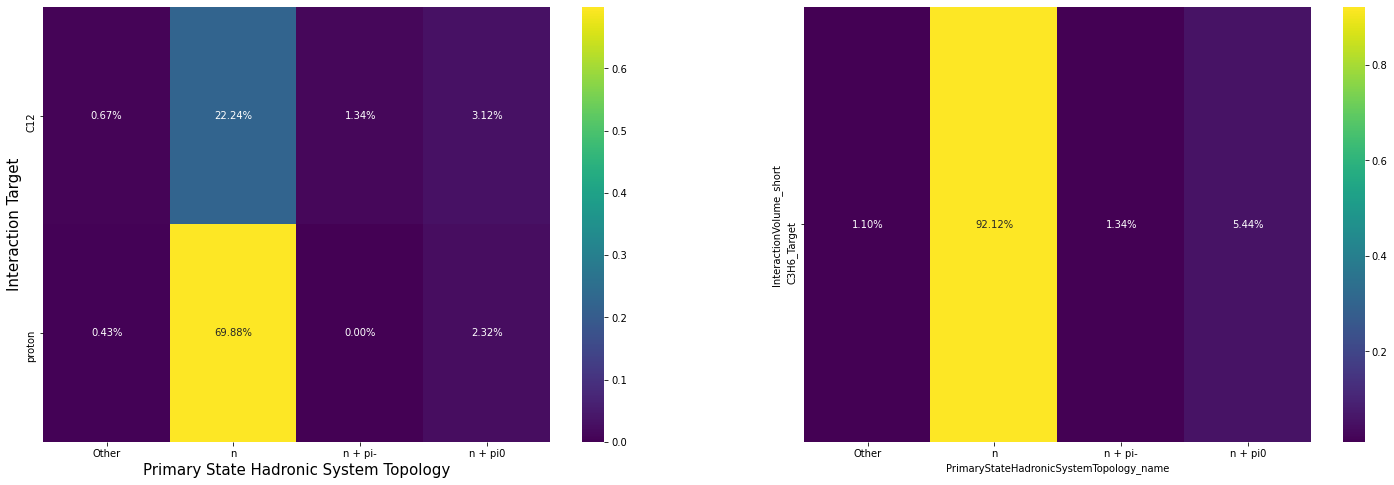

In [33]:
fig, ax = plt.subplots(1,2, figsize=(25, 8))

pivot_table_1cp = df.pivot_table(
    index='InteractionTarget',
    columns='PrimaryStateHadronicSystemTopology_name',
    values='NofFinalStateChargedParticles',
    aggfunc='count',
    fill_value=0
)

pivot_table_1cp_ = df.pivot_table(
    index='InteractionVolume_short',
    columns='PrimaryStateHadronicSystemTopology_name',
    values='NofFinalStateChargedParticles',
    aggfunc='count',
    fill_value=0
)

sns.heatmap(pivot_table_1cp/len(df.event_has_candidate), annot=True, fmt=".2%", cmap="viridis", ax=ax[0])

sns.heatmap(pivot_table_1cp_/len(df.event_has_candidate), annot=True, fmt=".2%", cmap="viridis", ax=ax[1])

# plt.suptitle('CUT : 1 Final state charged particle (truth)', fontsize=20)
ax[0].set_xlabel('Primary State Hadronic System Topology', fontsize=15)
ax[0].set_ylabel('Interaction Target', fontsize=15)

(array([  59.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        1578.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

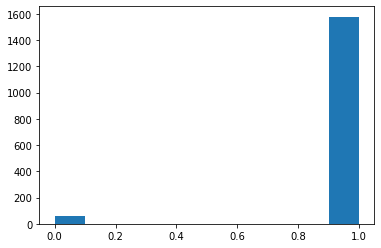

In [34]:
plt.hist(candidate_cells.dataframe.Fired_by_primary_neutron)

In [48]:
all_hists = []

Neutron True Kinetic energy and tof (signal event)


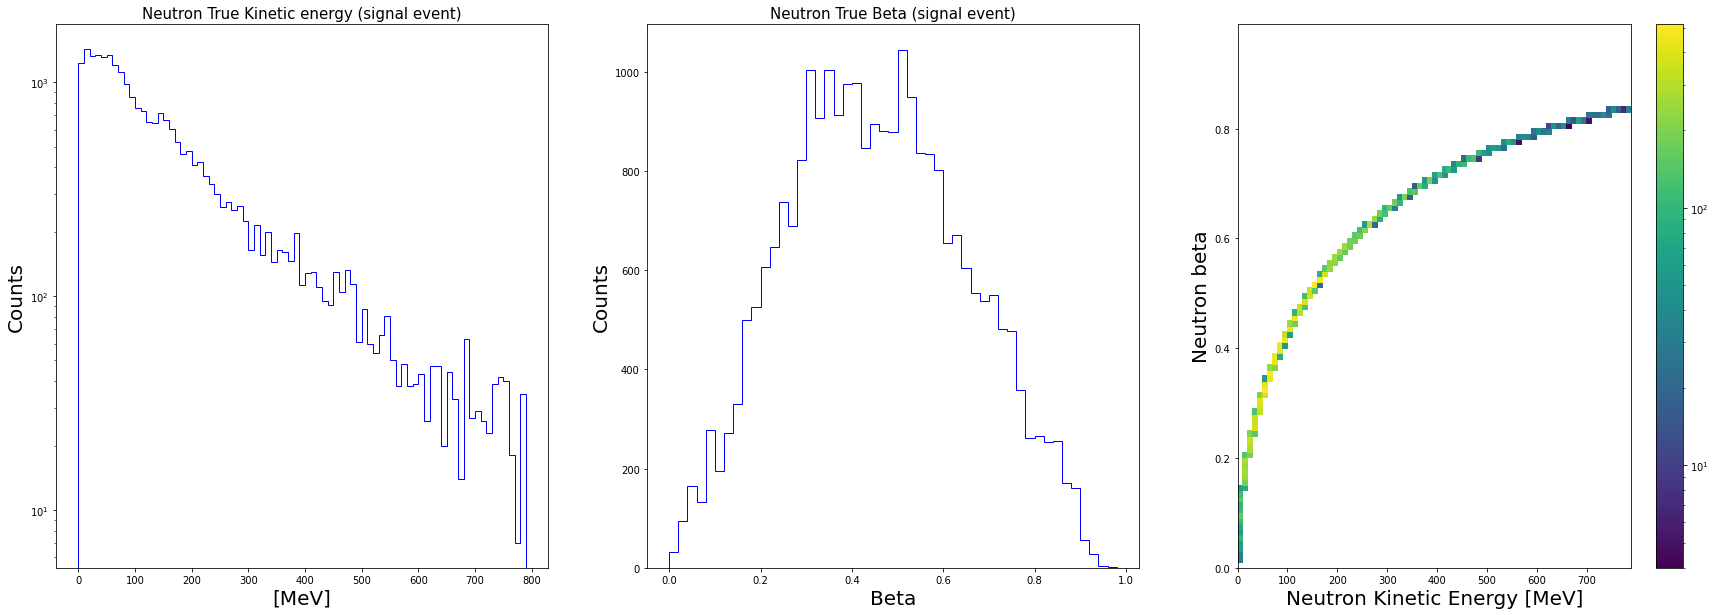

In [47]:
print("Neutron True Kinetic energy and tof (signal event)")
plotter = MultiPlotter(nrows=1, ncols=3, figsize=(30, 10))
# First histogram: Neutron True Kinetic Energy
plotter.plot_hist(
    data = signal_neutrons.dataframe['E_kin'],
    bins = np.arange(0, 800, 10),
    color = 'blue',
    xlabel = "[MeV]",
    ylabel = "Counts",
    log_scale = True
)
plotter.axes[0].set_title("Neutron True Kinetic energy (signal event)", fontsize=15)
plotter.next_plot()

# Second histogram: Neutron True Beta
plotter.plot_hist(
    data = signal_neutrons.dataframe['PrimariesBeta'],
    bins = np.arange(0, 1, 0.02),
    color = 'blue',
    xlabel = "Beta",
    ylabel = "Counts"
)
plotter.axes[1].set_title("Neutron True Beta (signal event)", fontsize=15)

plotter.next_plot()

plotter.plot_hist2d(
    x = signal_neutrons.dataframe['E_kin'],
    y = signal_neutrons.dataframe['PrimariesBeta'],
    bins_x = np.arange(0, 800, 10),
    bins_y = np.arange(0, 1, 0.01),
    xlabel = "Neutron Kinetic Energy [MeV]",
    ylabel = "Neutron beta",
    log_scale = True
)

all_hists.append(plotter)

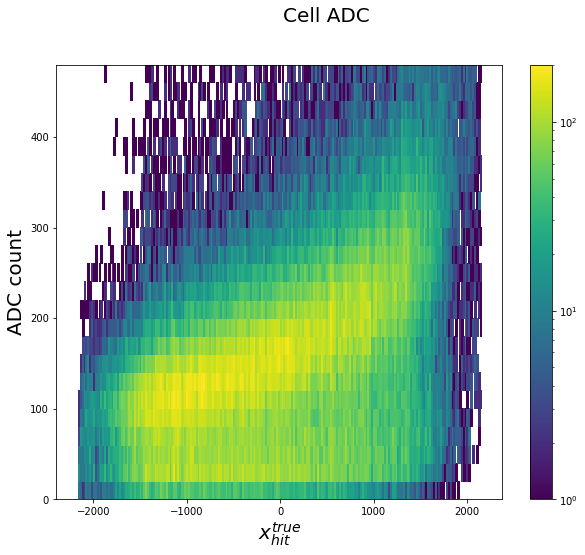

In [80]:
plotter = MultiPlotter(nrows=1, ncols=1, figsize=(10, 8), suptitle = "Cell ADC")

plotter.plot_hist2d(
    x =  fired_by_antimuons.dataframe.query("Fired_Cells_mod<30")['Fired_Cell_true_Hit_x'],
    y =  fired_by_antimuons.dataframe.query("Fired_Cells_mod<30")['Fired_Cells_adc1'],
    bins_x = np.arange(-2400,2400,20),
    bins_y = np.arange(0, 500, 20),
    log_scale = True,
    xlabel = r'$x_{hit}^{true}$',
    ylabel = 'ADC count',
)

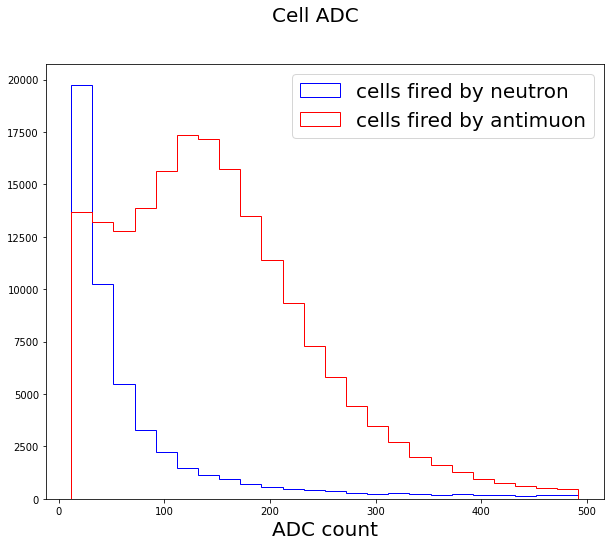

In [60]:
plotter = MultiPlotter(nrows=1, ncols=1, figsize=(10, 8), suptitle = "Cell ADC")

plotter.plot_hist(
    data = fired_by_reconstructable_neutron.dataframe['Fired_Cells_adc1'],
    bins = np.arange(12, 500, 20),
    color = 'blue',
    label = 'cells fired by neutron',
)

plotter.plot_hist(
    data = fired_by_antimuons.dataframe.query("Fired_Cells_mod<30")['Fired_Cells_adc1'],
    bins = np.arange(12, 500, 20),
    color = 'red',
    label = 'cells fired by antimuon',
    xlabel = 'ADC count'
)
plotter.axes[plotter.current_ax].legend(fontsize=20)
# plotter.next_plot(legend=True)

# all_hists.append(plotter)

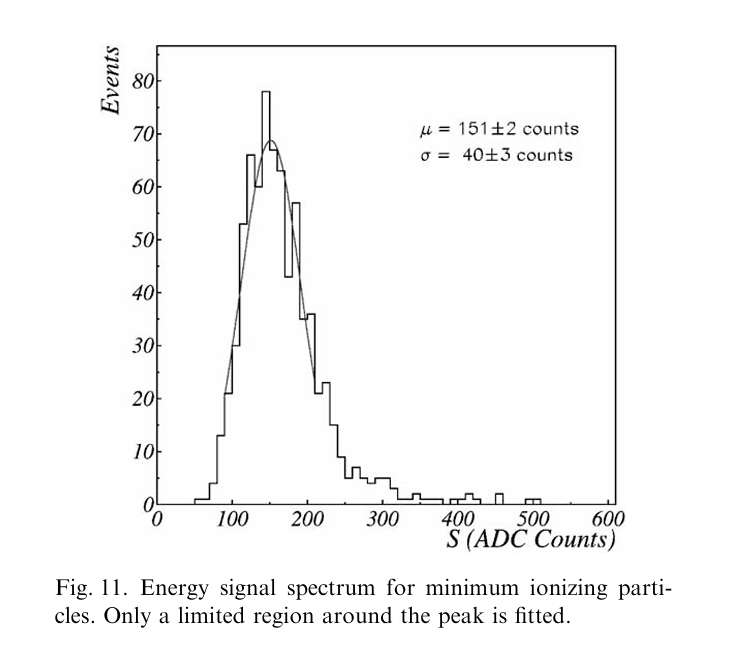

KeyError: 'ExpectedNeutron_TOF'

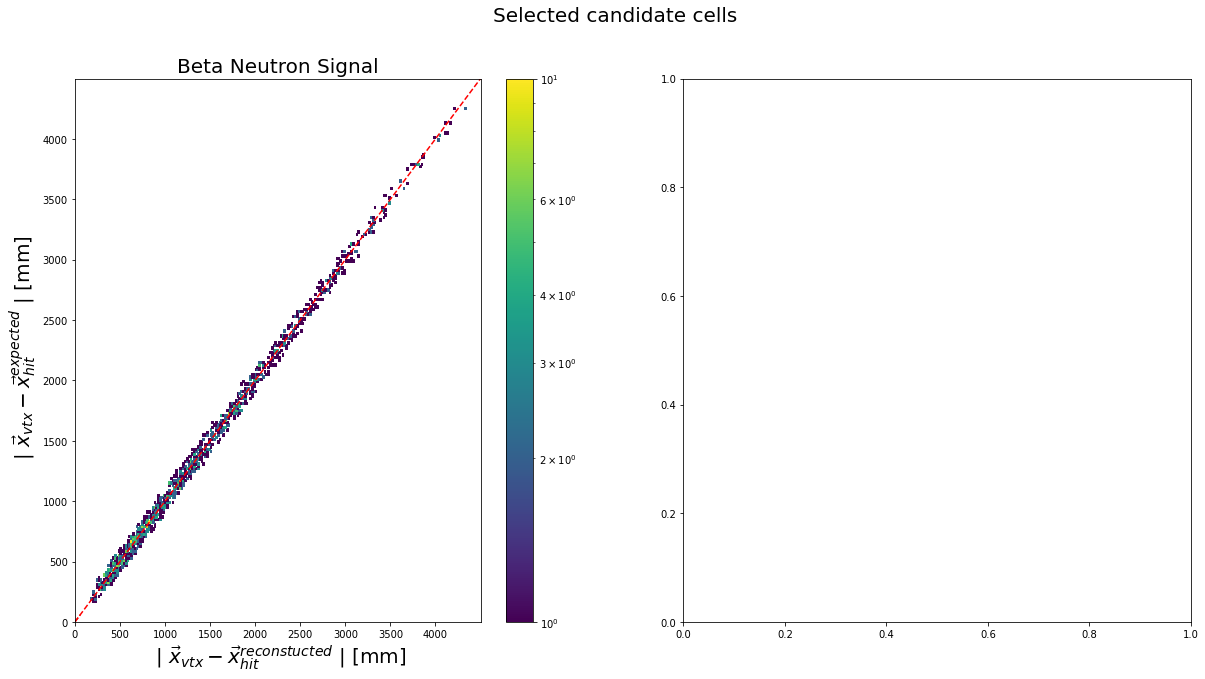

In [35]:
plotter = MultiPlotter(nrows=1, ncols=2, figsize=(20, 10), suptitle="Selected candidate cells")

plotter.plot_hist2d(
    x = candidate_cells.dataframe['Reconstructed_FlightLength'],
    y = candidate_cells.dataframe['ExpectedNeutron_FlightLength'],
    bins_x = np.arange(-0.1, 4500, 20),
    bins_y = np.arange(-0.1, 4500, 20),
    xlabel = r" | $\vec{x}_{vtx}-\vec{x}_{hit}^{reconstucted}$ | [mm]",
    ylabel = r" | $\vec{x}_{vtx}-\vec{x}_{hit}^{expected}$ | [mm]",
    log_scale = True,
)

plotter.axes[plotter.current_ax].plot([0,6000],[0,6000], linestyle='--', color='red')
plotter.axes[plotter.current_ax].set_title("Distance interaction vertex to fired cell", fontsize = 20)  

# plotter.next_plot()

# plotter.plot_hist2d(
#     # x = fired_by_reconstructable_neutron.AddInfo(other_sample=signal_neutrons_reconstructable_complete, variable='PrimariesBeta'),
#     x = signal_neutrons_reconstructable_complete.dataframe['PrimariesBeta'],
#     y = signal_neutrons_reconstructable_complete.dataframe['ExpectedNeutron_Beta'],
#     bins_x = np.arange(-0.1, 1, 0.01),
#     bins_y = np.arange(-0.1, 1, 0.01),
#     xlabel = "True",
#     ylabel = "Reconstructed",
#     log_scale = True,
# )

plotter.axes[plotter.current_ax].plot([0,60],[0,60], linestyle='--', color='red')
plotter.axes[plotter.current_ax].set_title("Beta Neutron Signal", fontsize = 20) 

plotter.next_plot()

plotter.plot_hist2d(
    x = candidate_cells.dataframe['Reconstructed_HitTime'] - 1,
    y = candidate_cells.dataframe['ExpectedNeutron_TOF'] +1,
    bins_x = np.arange(0, 60, 1),
    bins_y = np.arange(0, 60, 1),
    xlabel = r"$t_{hit}^{reconstucted}$ [ns]",
    ylabel = r"$t_{hit}^{expected}$",
    log_scale = True,
)

plotter.axes[plotter.current_ax].plot([0,60],[0,60], linestyle='--', color='red')
plotter.axes[plotter.current_ax].set_title("Time of Neutron hit in cell (signal)", fontsize = 20)

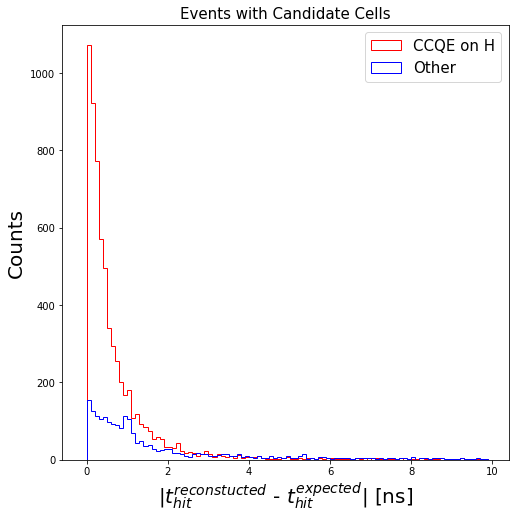

In [154]:
plotter = MultiPlotter(nrows=1, ncols=1, figsize=(8, 8))

# First histogram: Time of flight to ECAL for neutrons and muons
plotter.plot_hist(
    data = abs((candidate_cells.dataframe.query("CCQEonHydrogen==1")['Reconstructed_HitTime']-1) - (candidate_cells.dataframe.query("CCQEonHydrogen==1")['ExpectedNeutron_TOF']+1)),
    bins = np.arange(-0.1, 10, 0.1),
    label = 'CCQE on H',
    color = 'red',
    xlabel = r"|$t_{hit}^{reconstucted}$ - $t_{hit}^{expected}$| [ns]",
    ylabel = "Counts",
    # xlim = (0, 20),
    # ticks = np.arange(0, 20, 1)
)

plotter.plot_hist(
    data = abs((candidate_cells.dataframe.query("CCQEonHydrogen==0")['Reconstructed_HitTime']-1) - (candidate_cells.dataframe.query("CCQEonHydrogen==0")['ExpectedNeutron_TOF']+1)),
    bins = np.arange(-0.1, 10, 0.1),
    label = 'Other',
    color = 'blue',
    # xlabel = r"|$t_{hit}^{reconstucted}$ - $t_{hit}^{expected}$| [ns]",
    # ylabel = "Counts",
    # xlim = (0, 20),
    # ticks = np.arange(0, 20, 1)
)

plotter.axes[plotter.current_ax].set_title("Events with Candidate Cells", fontsize = 15)
plotter.axes[plotter.current_ax].legend(fontsize = 15)

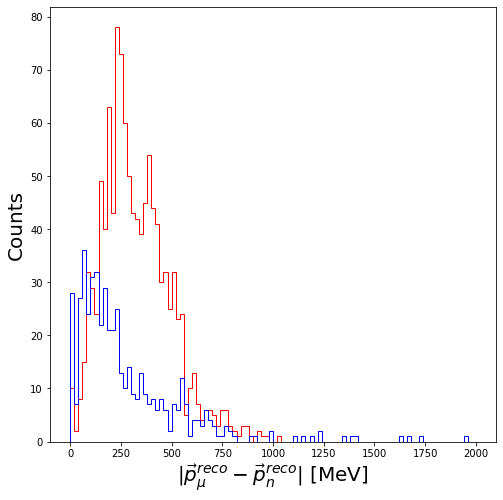

In [44]:
plotter = MultiPlotter(nrows=1, ncols=1, figsize=(8, 8))

# First histogram: Time of flight to ECAL for neutrons and muons
plotter.plot_hist(
    data = (candidate_cells.dataframe.query("CCQEonHydrogen==1")['Reconstructed_MissingPT']-1),
    bins = np.arange(-0.1, 2000, 20),
    label = 'CCQE on H',
    color = 'red',
    xlabel = r"$|\vec{p}_\mu^{reco} - \vec{p}_n^{reco}|$ [MeV]",
    ylabel = "Counts",
    # xlim = (0, 20),
    # ticks = np.arange(0, 20, 1)
)
# First histogram: Time of flight to ECAL for neutrons and muons
plotter.plot_hist(
    data = (candidate_cells.dataframe.query("CCQEonHydrogen==0")['Reconstructed_MissingPT']-1),
    bins = np.arange(-0.1, 2000, 20),
    label = 'Other',
    color = 'blue',
    xlabel = r"$|\vec{p}_\mu^{reco} - \vec{p}_n^{reco}|$ [MeV]",
    ylabel = "Counts",
    # xlim = (0, 20),
    # ticks = np.arange(0, 20, 1)
)

# ECAL hit recondtruction

Comparison Time of flight to ECAL for neutrons and muons


Text(0.5, 1.0, 'muon tof - neutron tof')

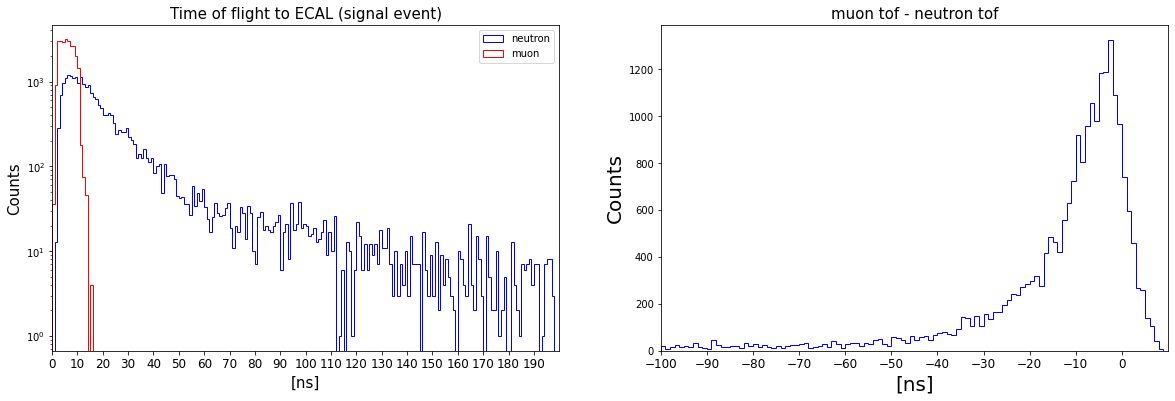

In [25]:
print("Comparison Time of flight to ECAL for neutrons and muons")
plotter = MultiPlotter(nrows=1, ncols=2, figsize=(20, 6))

# First histogram: Time of flight to ECAL for neutrons and muons
plotter.plot_hist(
    data = signal_neutrons_w_hits.dataframe['PrimariesFirstHitECAL_t'],
    bins = np.arange(0, 200, 1),
    label = 'neutron',
    color = 'blue',
    xlabel = "[ns]",
    ylabel = "Counts",
    xlim = (0, 200),
    ticks = np.arange(0, 200, 10)
)
plotter.plot_hist(
    data=signal_antimuons.dataframe.loc[signal_neutrons_w_hits.SampleIndex()]['PrimariesFirstHitECAL_t'],
    bins=np.arange(0, 200, 1),
    label='muon',
    color='red',
)
plotter.set_labels(xlabel="[ns]", ylabel="Counts", fontsize=15)
plotter.axes[0].set_yscale('log')
plotter.axes[0].set_title("Time of flight to ECAL (signal event)", fontsize=15)

plotter.next_plot(plot_legend=True)

# Second histogram: Difference between muon and neutron time of flight
plotter.plot_hist(
    data = signal_antimuons.dataframe.loc[signal_neutrons_w_hits.SampleIndex()]['PrimariesFirstHitECAL_t'].values - signal_neutrons_w_hits.dataframe['PrimariesFirstHitECAL_t'].values,
    bins = np.arange(-100, 10, 1),
    xlabel = "[ns]",
    ylabel = "Counts",
    xlim = (-100, 10),
    ticks = np.arange(-100, 10, 10)
)
plotter.axes[1].set_title("muon tof - neutron tof", fontsize=15)

all_hists.append(plotter)

In [56]:
fired_by_antimuons.dataframe.columns

Index(['entry', 'CCQEonHydrogen', 'EventId', 'Fired_Cells_mod',
       'Fired_Cells_x', 'Fired_Cells_y', 'Fired_Cells_z', 'isCellComplete',
       'Fired_Cells_adc1', 'Fired_Cells_tdc1', 'Fired_Cells_adc2',
       'Fired_Cells_tdc2', 'Fired_Cell_true_hit1_x', 'Fired_Cell_true_hit1_y',
       'Fired_Cell_true_hit1_z', 'Fired_Cell_true_hit1_t',
       'Fired_Cell_true_hit2_x', 'Fired_Cell_true_hit2_y',
       'Fired_Cell_true_hit2_z', 'Fired_Cell_true_hit2_t',
       'Fired_by_primary_neutron', 'Fired_by_primary_antimu',
       'Fired_Cell_true_Hit_x', 'Fired_Cell_true_Hit_y',
       'Fired_Cell_true_Hit_z', 'Fired_Cell_true_Hit_t',
       'ExpectedNeutron_HitPosition_x', 'ExpectedNeutron_HitPosition_y',
       'ExpectedNeutron_HitPosition_z', 'ExpectedNeutron_TOF',
       'Reconstructed_HitPosition_x', 'Reconstructed_HitPosition_y',
       'Reconstructed_HitPosition_z', 'Reconstructed_HitTime',
       'ExpectedNeutron_Beta', 'True_FlightLength',
       'ExpectedNeutron_FlightLength', 'R

In [107]:
fired_by_reconstructable_neutron.dataframe.columns

Index(['entry', 'CCQEonHydrogen', 'EventId', 'Fired_Cells_mod',
       'Fired_Cells_x', 'Fired_Cells_y', 'Fired_Cells_z', 'isCellComplete',
       'Fired_Cells_adc1', 'Fired_Cells_tdc1', 'Fired_Cells_adc2',
       'Fired_Cells_tdc2', 'Fired_Cell_true_hit1_x', 'Fired_Cell_true_hit1_y',
       'Fired_Cell_true_hit1_z', 'Fired_Cell_true_hit1_t',
       'Fired_Cell_true_hit2_x', 'Fired_Cell_true_hit2_y',
       'Fired_Cell_true_hit2_z', 'Fired_Cell_true_hit2_t',
       'Fired_by_primary_neutron', 'Fired_by_primary_antimu',
       'Fired_Cell_true_Hit_x', 'Fired_Cell_true_Hit_y',
       'Fired_Cell_true_Hit_z', 'Fired_Cell_true_Hit_t',
       'ExpectedNeutron_HitPosition_x', 'ExpectedNeutron_HitPosition_y',
       'ExpectedNeutron_HitPosition_z', 'ExpectedNeutron_TOF',
       'Reconstructed_HitPosition_x', 'Reconstructed_HitPosition_y',
       'Reconstructed_HitPosition_z', 'Reconstructed_HitTime',
       'ExpectedNeutron_Beta', 'True_FlightLength',
       'ExpectedNeutron_FlightLength', 'R

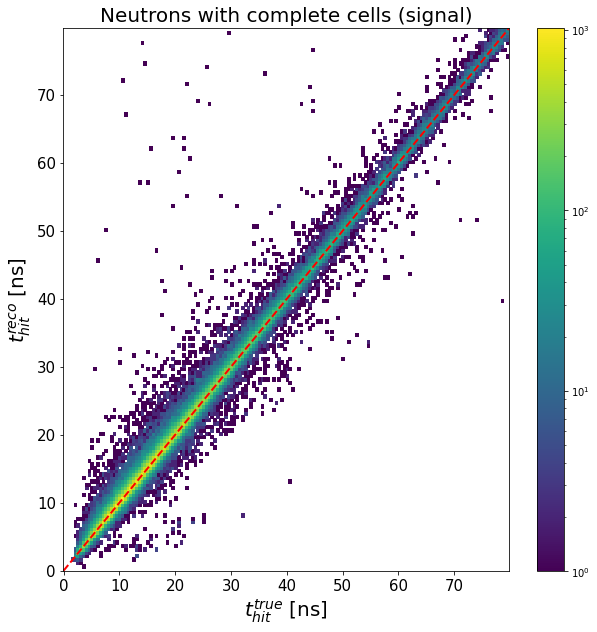

In [63]:
plotter = MultiPlotter(nrows=1, ncols=1, figsize=(10, 10))

# First 2D histogram plot with logarithmic scale
plotter.plot_hist2d(
    x = complete_fired_by_signal_neutron['Fired_Cell_true_Hit_t'],
    y = complete_fired_by_signal_neutron['Reconstructed_HitTime'] - 1,
    bins_x = np.arange(-0.1, 80, 0.5),
    bins_y = np.arange(-0.1, 80, 0.5),
    log_scale = True,
    xlabel = r'$t_{hit}^{true}$ [ns]',
    ylabel = r'$t_{hit}^{reco}$ [ns]',
)

plotter.axes[plotter.current_ax].tick_params(axis='x', labelsize=15)
plotter.axes[plotter.current_ax].tick_params(axis='y', labelsize=15)
plotter.axes[plotter.current_ax].set_title("Neutrons with complete cells (signal)", fontsize = 20)

plotter.axes[plotter.current_ax].plot([0, 80], [0, 80], color='red', linestyle='--', linewidth=2)
# plotter.next_plot()

# plotter.plot_hist2d(
#     x = fired_by_reconstructable_neutron.dataframe.query("Fired_Cells_mod >= 30")['Fired_Cell_true_Hit_t'],
#     y = fired_by_reconstructable_neutron.dataframe.query("Fired_Cells_mod >= 30")['Reconstructed_HitTime'] - 1,
#     bins_x = np.arange(-0.1, 80, 0.5),
#     bins_y = np.arange(-0.1, 80, 0.5),
#     log_scale = True,
#     xlabel = r'$t_{hit}^{true}$ [ns]',
#     ylabel = r'$t_{hit}^{reco}$ [ns]',
# )

# # plotter.axes[plotter.current_ax].plot([0, 80], [0, 80], color='red', linestyle='--', linewidth=2)
# plotter.axes[plotter.current_ax].tick_params(axis='x', labelsize=15)
# plotter.axes[plotter.current_ax].tick_params(axis='y', labelsize=15)
# plotter.axes[plotter.current_ax].set_title("ENDCAP", fontsize = 15)
plt.savefig("/storage/gpfs_data/neutrino/users/gi/sand-physics/notebook/figures/ECAL_reco/t_hit_true_vs_reco_neutrons.pdf")

fwhm_x is :0.5281553398058254
 FCN=7191.53 FROM MIGRAD    STATUS=CONVERGED      82 CALLS          83 TOTAL
                     EDM=5.636e-12    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     2.50473e+03   7.06662e+00   2.08322e-01  -6.01456e-07
   2  Mean         1.54664e-01   6.44971e-04   2.65115e-05   2.28476e-03
   3  Sigma        3.09309e-01   6.48837e-04   2.04408e-05  -3.45497e-03


Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas_name
Info in <TCanvas::Print>: pdf file /storage/gpfs_data/neutrino/users/gi/sand-physics/notebook/figures/ECAL_reco/hit_time_true_vs_reco_antimu.pdf has been created


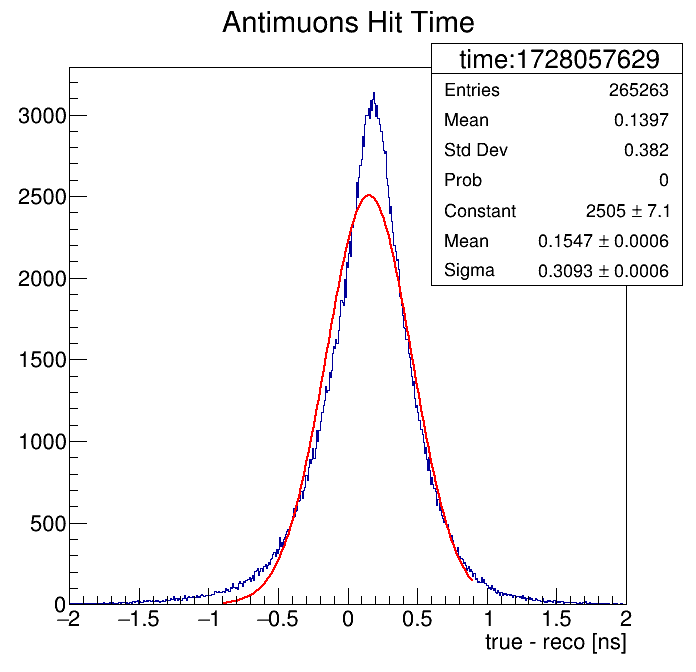

In [176]:
residuals_x = tool.FillTH1D(iterable = fired_by_antimuons.dataframe['Fired_Cell_true_Hit_t'] - fired_by_antimuons.dataframe['Reconstructed_HitTime'], 
                          histogram_name = "", 
                          title = "Antimuons Hit Time; true - reco [ns]", 
                          nbins = int(np.sqrt(len(fired_by_antimuons.dataframe['Fired_Cell_true_hit1_t']))),
                          #  nbins = 30,
                          x_min = -2, 
                          x_max = 2)


residuals_x, mean_res_x, sigma_res_x,err_mean, err_sigma = tool.FitTH1D_w_gauss(hist = residuals_x, 
                                             gauss_range = (-2, 2), 
                                             fit_range = (-0.9,0.9))



bin1_x = residuals_x.FindFirstBinAbove(residuals_x.GetMaximum()/2)
bin2_x = residuals_x.FindLastBinAbove(residuals_x.GetMaximum()/2)
fwhm_x = residuals_x.GetBinCenter(bin2_x) - residuals_x.GetBinCenter(bin1_x)


print(f"fwhm_x is :{fwhm_x}")
# print(f"fwhm_y is :{fwhm_y}")


c = ROOT.TCanvas("canvas_name", "Canvas", 700, 700)
# c.Divide(2)

# c.cd(1)
ROOT.gStyle.SetOptFit(1011)
residuals_x.Draw()
c.Draw()

# c.cd(2)
# ROOT.gStyle.SetOptFit(1011)
# residuals_y.Draw()
# c.Draw()

c.SaveAs("/storage/gpfs_data/neutrino/users/gi/sand-physics/notebook/figures/ECAL_reco/hit_time_true_vs_reco_antimu.pdf")

In [69]:
fired_by_reconstructable_neutron.dataframe.columns

Index(['entry', 'CCQEonHydrogen', 'EventId', 'Fired_Cells_mod',
       'Fired_Cells_x', 'Fired_Cells_y', 'Fired_Cells_z', 'isCellComplete',
       'Fired_Cells_adc1', 'Fired_Cells_tdc1', 'Fired_Cells_adc2',
       'Fired_Cells_tdc2', 'Fired_Cell_true_hit1_x', 'Fired_Cell_true_hit1_y',
       'Fired_Cell_true_hit1_z', 'Fired_Cell_true_hit1_t',
       'Fired_Cell_true_hit2_x', 'Fired_Cell_true_hit2_y',
       'Fired_Cell_true_hit2_z', 'Fired_Cell_true_hit2_t',
       'Fired_by_primary_neutron', 'Fired_by_primary_antimu',
       'Fired_Cell_true_Hit_x', 'Fired_Cell_true_Hit_y',
       'Fired_Cell_true_Hit_z', 'Fired_Cell_true_Hit_t',
       'ExpectedNeutron_HitPosition_x', 'ExpectedNeutron_HitPosition_y',
       'ExpectedNeutron_HitPosition_z', 'ExpectedNeutron_TOF',
       'Reconstructed_HitPosition_x', 'Reconstructed_HitPosition_y',
       'Reconstructed_HitPosition_z', 'Reconstructed_HitTime',
       'ExpectedNeutron_Beta', 'True_FlightLength',
       'ExpectedNeutron_FlightLength', 'R

fwhm_x is :163.8888888888888
 FCN=470.174 FROM MIGRAD    STATUS=CONVERGED      66 CALLS          67 TOTAL
                     EDM=4.03076e-08    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     3.29395e+02   2.85029e+00   2.15013e-02   5.02116e-06
   2  Mean         6.21452e-01   6.68989e-01   7.09020e-03   4.24111e-04
   3  Sigma        9.37846e+01   7.64636e-01   2.21971e-05   3.42166e-03


Warning in <TROOT::Append>: Replacing existing TH1:  time:1727767515 (Potential memory leak).
Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas_name
Info in <TCanvas::Print>: pdf file /storage/gpfs_data/neutrino/users/gi/sand-physics/notebook/figures/ECAL_reco/hit_position_along_fiber_true_vs_reco_neutrons.pdf has been created


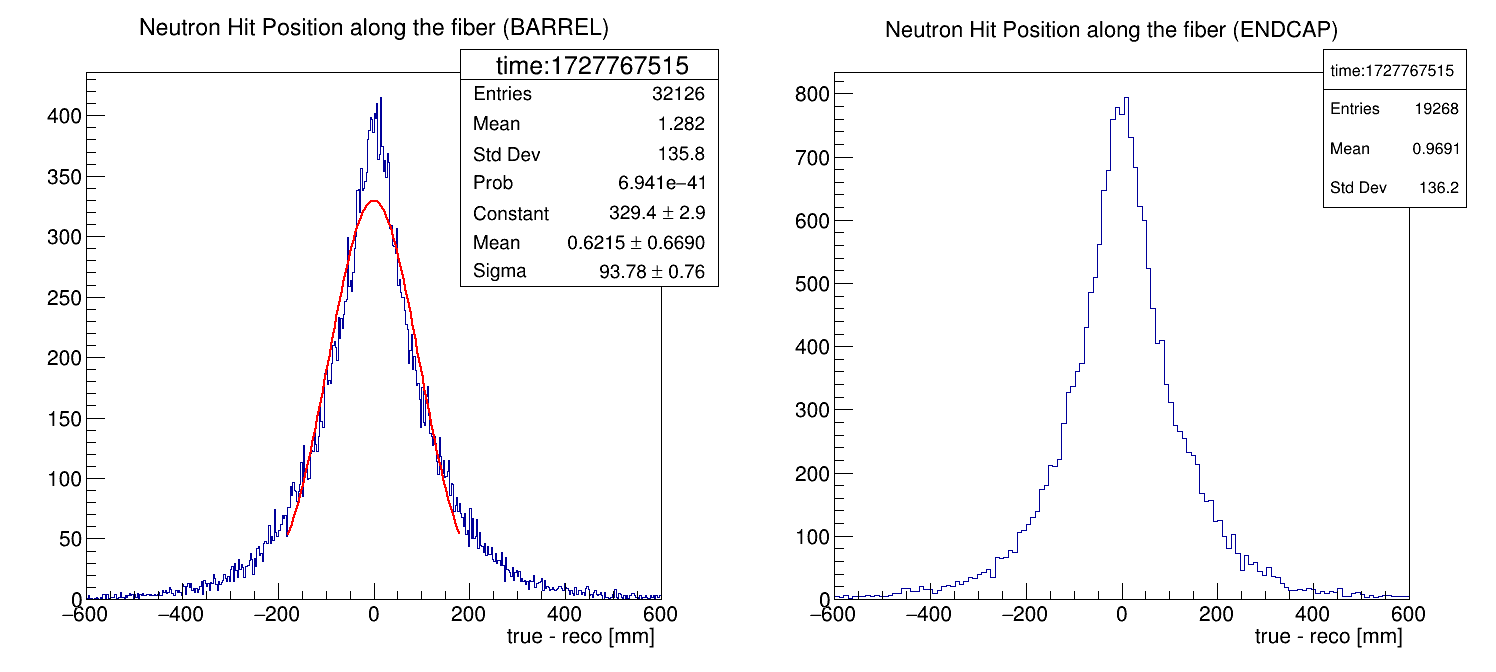

In [31]:

# barrels
residuals_hit_x = tool.FillTH1D(iterable = fired_by_reconstructable_neutron.dataframe.query("Fired_Cells_mod < 30")['Fired_Cell_true_Hit_x'] - fired_by_reconstructable_neutron.dataframe.query("Fired_Cells_mod < 30")['Reconstructed_HitPosition_x'], 
                          histogram_name = "", 
                          title = "Neutron Hit Position along the fiber (BARREL); true - reco [mm]", 
                          nbins = int(np.sqrt(len(fired_by_antimuons.dataframe.query("Fired_Cells_mod < 30")['Fired_Cell_true_Hit_x']))),
                          #  nbins = 30,
                          x_min = -600, 
                          x_max = 600)
# endcaps
residuals_hit_y = tool.FillTH1D(iterable = fired_by_reconstructable_neutron.dataframe.query("Fired_Cells_mod >= 30")['Fired_Cell_true_Hit_y'] - fired_by_reconstructable_neutron.dataframe.query("Fired_Cells_mod >= 30")['Reconstructed_HitPosition_y'], 
                          histogram_name = "", 
                          title = "Neutron Hit Position along the fiber (ENDCAP); true - reco [mm]", 
                          nbins = int(np.sqrt(len(fired_by_antimuons.dataframe.query("Fired_Cells_mod >= 30")['Fired_Cell_true_Hit_y']))),
                          #  nbins = 30,
                          x_min = -600, 
                          x_max = 600)

bin1_x = residuals_hit_x.FindFirstBinAbove(residuals_hit_x.GetMaximum()/2)
bin2_x = residuals_hit_x.FindLastBinAbove(residuals_hit_x.GetMaximum()/2)
fwhm_x = residuals_hit_x.GetBinCenter(bin2_x) - residuals_hit_x.GetBinCenter(bin1_x)

# bin1_y = residuals_hit_y.FindFirstBinAbove(residuals_hit_y.GetMaximum()/2)
# bin2_y = residuals_hit_y.FindLastBinAbove(residuals_hit_y.GetMaximum()/2)
# fwhm_y = residuals_hit_y.GetBinCenter(bin2_y) - residuals_hit_y.GetBinCenter(bin1_y)

print(f"fwhm_x is :{fwhm_x}")
# print(f"fwhm_y is :{fwhm_y}")

# residuals_hit_z = tool.FillTH1D(iterable = fired_by_reconstructable_neutron.dataframe['Fired_Cell_true_Hit_z'] - fired_by_reconstructable_neutron.dataframe['Reconstructed_HitPosition_z'], 
#                           histogram_name = "", 
#                           title = "neutron hit_z; true - reco [mm]", 
#                           nbins = int(np.sqrt(len(fired_by_antimuons.dataframe['Fired_Cell_true_hit1_z']))),
#                           #  nbins = 30,
#                           x_min = -60, 
#                           x_max = 60)


residuals_hit_x, mean_res_x, sigma_res_x = tool.FitTH1D_w_gauss(hist = residuals_hit_x, 
                                             gauss_range = (-500, 500), 
                                             fit_range = (-180,180))

# residuals_hit_y, mean_res_y, sigma_res_y = tool.FitTH1D_w_gauss(hist = residuals_hit_y, 
#                                              gauss_range = (-500, 500), 
#                                              fit_range = (-180,180))


c = ROOT.TCanvas("canvas_name", "Canvas", 1500, 700)
c.Divide(2)

c.cd(1)
ROOT.gStyle.SetOptFit(1011)
residuals_hit_x.Draw()
c.Draw()

c.cd(2)
ROOT.gStyle.SetOptFit(1011)
residuals_hit_y.Draw()
c.Draw()

# c.cd(3)
# ROOT.gStyle.SetOptFit(1011)
# residuals_hit_z.Draw()
# c.Draw()
c.SaveAs("/storage/gpfs_data/neutrino/users/gi/sand-physics/notebook/figures/ECAL_reco/hit_position_along_fiber_true_vs_reco_neutrons.pdf")

fwhm_x is :1.0279329608938546
fwhm_y is :163.8888888888888


Warning in <TROOT::Append>: Replacing existing TH1:  time:1727770301 (Potential memory leak).
Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas_name
Info in <TCanvas::Print>: pdf file /storage/gpfs_data/neutrino/users/gi/sand-physics/notebook/figures/ECAL_reco/hit_time__and_space_ECAL_res_neutrons_nofit.pdf has been created


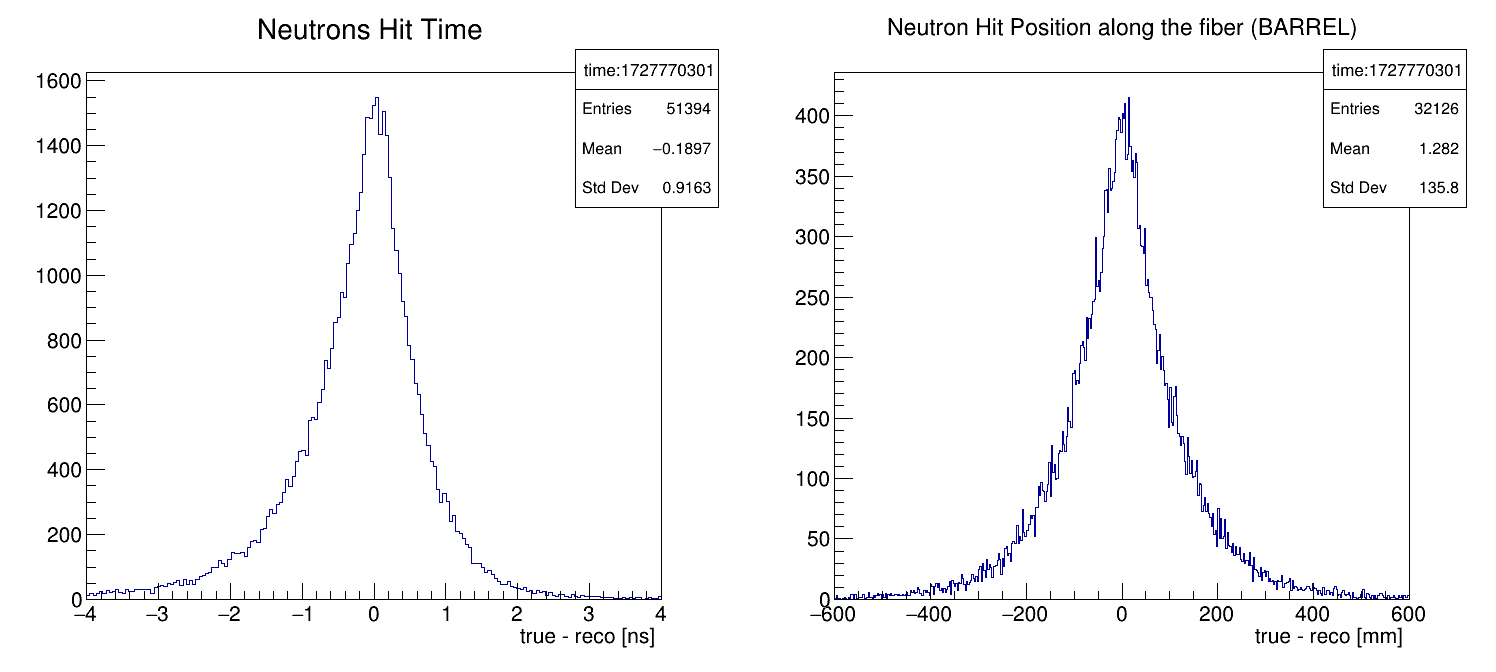

In [54]:
residuals_x = tool.FillTH1D(iterable = fired_by_reconstructable_neutron.dataframe['Fired_Cell_true_Hit_t'] + 1 - fired_by_reconstructable_neutron.dataframe['Reconstructed_HitTime'], 
                          histogram_name = "", 
                          title = "Neutrons Hit Time; true - reco [ns]", 
                          nbins = int(np.sqrt(len(fired_by_reconstructable_neutron.dataframe.query("Fired_Cells_mod < 30")['Fired_Cell_true_hit1_t']))),
                          #  nbins = 30,
                          x_min = -4, 
                          x_max = 4)

residuals_y = tool.FillTH1D(iterable = fired_by_reconstructable_neutron.dataframe.query("Fired_Cells_mod < 30")['Fired_Cell_true_Hit_x'] - fired_by_reconstructable_neutron.dataframe.query("Fired_Cells_mod < 30")['Reconstructed_HitPosition_x'], 
                          histogram_name = "", 
                          title = "Neutron Hit Position along the fiber (BARREL); true - reco [mm]", 
                          nbins = int(np.sqrt(len(fired_by_antimuons.dataframe.query("Fired_Cells_mod < 30")['Fired_Cell_true_Hit_x']))),
                          #  nbins = 30,
                          x_min = -600, 
                          x_max = 600)


# residuals_x, mean_res_x, sigma_res_x = tool.FitTH1D_w_gauss(hist = residuals_x, 
#                                              gauss_range = (-4, 4), 
#                                              fit_range = (-0.9,0.9))

# residuals_y, mean_res_y, sigma_res_y = tool.FitTH1D_w_gauss(hist = residuals_y, 
#                                              gauss_range = (-500, 500), 
#                                              fit_range = (-180,180))

bin1_x = residuals_x.FindFirstBinAbove(residuals_x.GetMaximum()/2)
bin2_x = residuals_x.FindLastBinAbove(residuals_x.GetMaximum()/2)
fwhm_x = residuals_x.GetBinCenter(bin2_x) - residuals_x.GetBinCenter(bin1_x)

bin1_y = residuals_y.FindFirstBinAbove(residuals_y.GetMaximum()/2)
bin2_y = residuals_y.FindLastBinAbove(residuals_y.GetMaximum()/2)
fwhm_y = residuals_y.GetBinCenter(bin2_y) - residuals_y.GetBinCenter(bin1_y)

print(f"fwhm_x is :{fwhm_x}")
print(f"fwhm_y is :{fwhm_y}")


c = ROOT.TCanvas("canvas_name", "Canvas", 1500, 700)
c.Divide(2)

c.cd(1)
ROOT.gStyle.SetOptFit(1011)
residuals_x.Draw()
c.Draw()

c.cd(2)
ROOT.gStyle.SetOptFit(1011)
residuals_y.Draw()
c.Draw()

c.SaveAs("/storage/gpfs_data/neutrino/users/gi/sand-physics/notebook/figures/ECAL_reco/hit_time__and_space_ECAL_res_neutrons_nofit.pdf")

fwhm_x is :113.8888888888888
fwhm_y is :102.32558139534888
 FCN=3031.15 FROM MIGRAD    STATUS=CONVERGED      64 CALLS          65 TOTAL
                     EDM=5.99247e-08    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     3.36926e+03   1.07009e+01   2.13027e-01  -4.19968e-05
   2  Mean         1.81010e-01   1.40646e-01   3.78157e-03  -1.11907e-04
   3  Sigma        5.95255e+01   1.28272e-01   1.40227e-05  -2.95019e-01


Warning in <TROOT::Append>: Replacing existing TH1:  time:1727767790 (Potential memory leak).
Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas_name
Info in <TCanvas::Print>: pdf file /storage/gpfs_data/neutrino/users/gi/sand-physics/notebook/figures/ECAL_reco/hit_position_along_fiber_true_vs_reco_antimu.pdf has been created


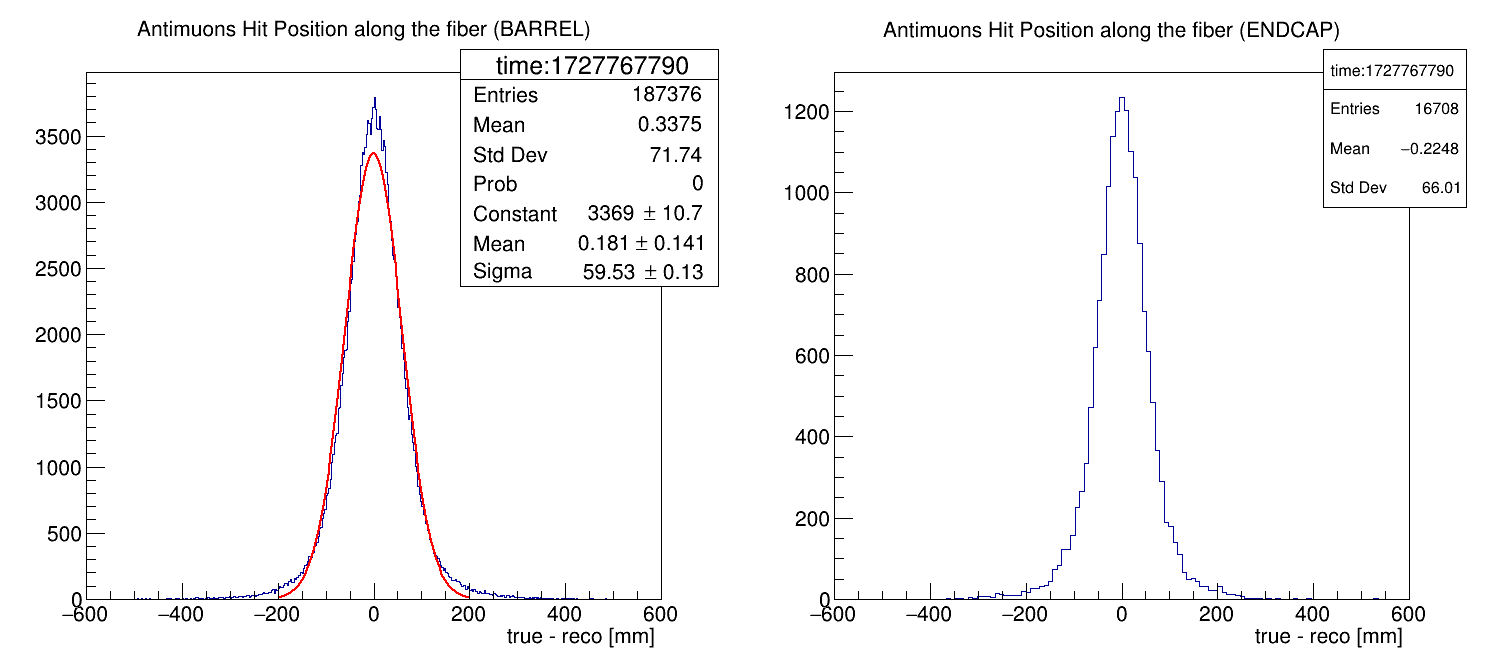

In [36]:
# barrels
residuals_hit_x = tool.FillTH1D(iterable = fired_by_antimuons.dataframe.query("Fired_Cells_mod < 30")['Fired_Cell_true_Hit_x'] - fired_by_antimuons.dataframe.query("Fired_Cells_mod < 30")['Reconstructed_HitPosition_x'], 
                          histogram_name = "", 
                          title = "Antimuons Hit Position along the fiber (BARREL); true - reco [mm];", 
                          nbins = int(np.sqrt(len(fired_by_antimuons.dataframe.query("Fired_Cells_mod < 30")['Fired_Cell_true_Hit_x']))),
                          #  nbins = 30,
                          x_min = -600, 
                          x_max = 600)
# endcaps
residuals_hit_y = tool.FillTH1D(iterable = fired_by_antimuons.dataframe.query("Fired_Cells_mod >= 30")['Fired_Cell_true_Hit_y'] - fired_by_antimuons.dataframe.query("Fired_Cells_mod >= 30")['Reconstructed_HitPosition_y'], 
                          histogram_name = "", 
                          title = "Antimuons Hit Position along the fiber (ENDCAP); true - reco [mm];", 
                          nbins = int(np.sqrt(len(fired_by_antimuons.dataframe.query("Fired_Cells_mod >= 30")['Fired_Cell_true_Hit_y']))),
                          #  nbins = 30,
                          x_min = -600, 
                          x_max = 600)

# residuals_hit_z = tool.FillTH1D(iterable = fired_by_antimuons.dataframe['Fired_Cell_true_hit1_z'] - fired_by_antimuons.dataframe['Cell_Reconstructed_hit_z'], 
#                           histogram_name = "", 
#                           title = "neutron hit_z; true - reco [mm]", 
#                           nbins = int(np.sqrt(len(fired_by_antimuons.dataframe['Fired_Cell_true_hit1_z']))),
#                           #  nbins = 30,
#                           x_min = -60, 
#                           x_max = 60)


residuals_hit_x, mean_res_x, sigma_res_x = tool.FitTH1D_w_gauss(hist = residuals_hit_x, 
                                             gauss_range = (-500, 500), 
                                             fit_range = (-200,200))

# residuals_hit_y, mean_res_y, sigma_res_y = tool.FitTH1D_w_gauss(hist = residuals_hit_y, 
#                                              gauss_range = (-500, 500), 
#                                              fit_range = (-200,200))


bin1_x = residuals_hit_x.FindFirstBinAbove(residuals_hit_x.GetMaximum()/2)
bin2_x = residuals_hit_x.FindLastBinAbove(residuals_hit_x.GetMaximum()/2)
fwhm_x = residuals_hit_x.GetBinCenter(bin2_x) - residuals_hit_x.GetBinCenter(bin1_x)

bin1_y = residuals_hit_y.FindFirstBinAbove(residuals_hit_y.GetMaximum()/2)
bin2_y = residuals_hit_y.FindLastBinAbove(residuals_hit_y.GetMaximum()/2)
fwhm_y = residuals_hit_y.GetBinCenter(bin2_y) - residuals_hit_y.GetBinCenter(bin1_y)


print(f"fwhm_x is :{fwhm_x}")
print(f"fwhm_y is :{fwhm_y}")

bin1_x = residuals_hit_x.FindFirstBinAbove(residuals_hit_x.GetMaximum()/2)
bin2_x = residuals_hit_x.FindLastBinAbove(residuals_hit_x.GetMaximum()/2)
fwhm_x = residuals_hit_x.GetBinCenter(bin2_x) - residuals_hit_x.GetBinCenter(bin1_x)

bin1_y = residuals_hit_y.FindFirstBinAbove(residuals_hit_y.GetMaximum()/2)
bin2_y = residuals_hit_y.FindLastBinAbove(residuals_hit_y.GetMaximum()/2)
fwhm_y = residuals_hit_y.GetBinCenter(bin2_y) - residuals_hit_y.GetBinCenter(bin1_y)

c = ROOT.TCanvas("canvas_name", "Canvas", 1500, 700)
c.Divide(2)

c.cd(1)
ROOT.gStyle.SetOptFit(1011)
residuals_hit_x.Draw()
c.Draw()

c.cd(2)
ROOT.gStyle.SetOptFit(1011)
residuals_hit_y.Draw()
c.Draw()

# c.cd(3)
# ROOT.gStyle.SetOptFit(1011)
# residuals_hit_z.Draw()
# c.Draw()

c.SaveAs("/storage/gpfs_data/neutrino/users/gi/sand-physics/notebook/figures/ECAL_reco/hit_position_along_fiber_true_vs_reco_antimu.pdf")

fwhm_x is :0.6917960088691795
fwhm_y is :113.8888888888888
 FCN=1498.41 FROM MIGRAD    STATUS=CONVERGED      72 CALLS          73 TOTAL
                     EDM=5.31479e-12    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     2.05650e+03   6.15829e+00   8.82133e-02  -3.66591e-08
   2  Mean         1.24962e-03   7.91780e-04   1.49047e-05  -2.59392e-03
   3  Sigma        3.36816e-01   7.00551e-04   1.00202e-05  -4.09696e-03
 FCN=2166.74 FROM MIGRAD    STATUS=CONVERGED      64 CALLS          65 TOTAL
                     EDM=5.9394e-09    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     3.39639e+03   1.06790e+01   1.81825e-01  -1.58437e-06
   2  Mean         1.81089e-01   1.40453e-01   3

Warning in <TROOT::Append>: Replacing existing TH1:  time:1727770007 (Potential memory leak).
Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas_name
Info in <TCanvas::Print>: pdf file /storage/gpfs_data/neutrino/users/gi/sand-physics/notebook/figures/ECAL_reco/hit_time__and_space_ECAL_res_antimu.pdf has been created


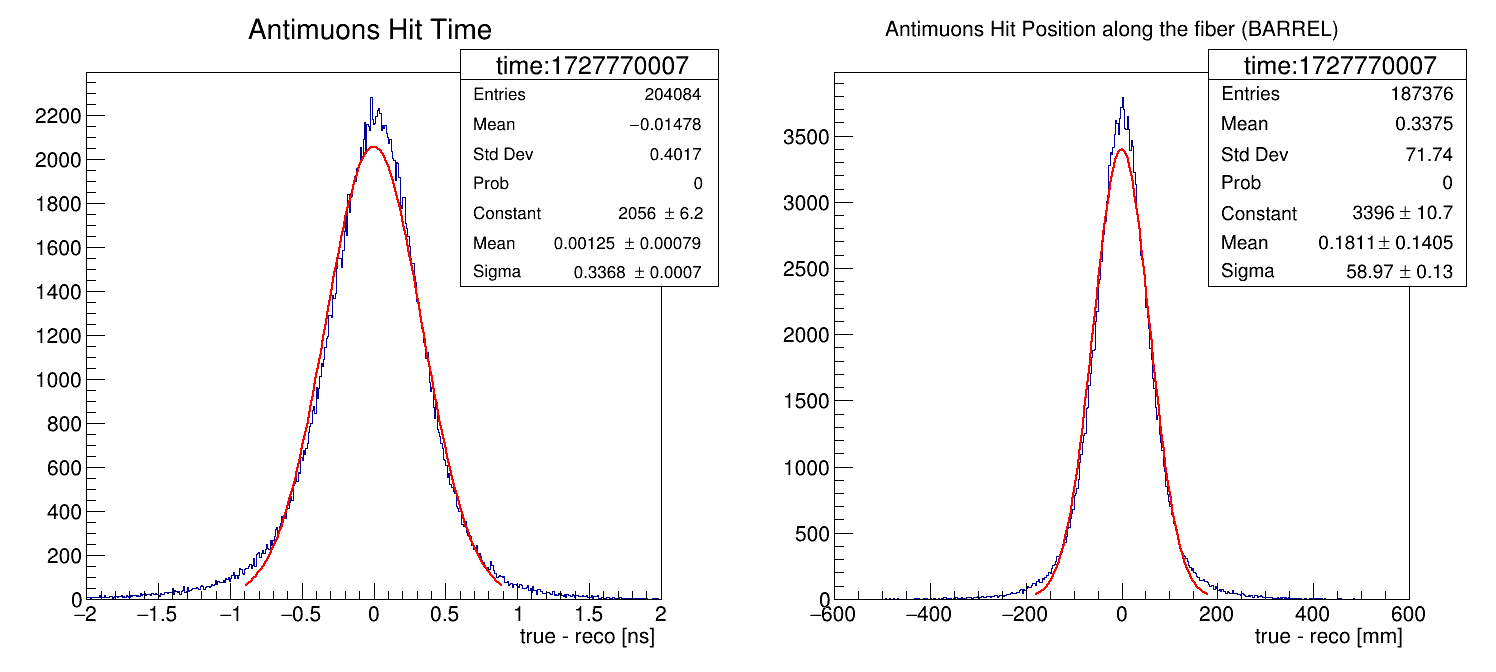

In [48]:
residuals_x = tool.FillTH1D(iterable = fired_by_antimuons.dataframe['Fired_Cell_true_Hit_t'] + 0.95 - fired_by_antimuons.dataframe['Reconstructed_HitTime'], 
                          histogram_name = "", 
                          title = "Antimuons Hit Time; true - reco [ns]", 
                          nbins = int(np.sqrt(len(fired_by_antimuons.dataframe['Fired_Cell_true_hit1_t']))),
                          #  nbins = 30,
                          x_min = -2, 
                          x_max = 2)
# barrels
residuals_hit_y = tool.FillTH1D(iterable = fired_by_antimuons.dataframe.query("Fired_Cells_mod < 30")['Fired_Cell_true_Hit_x'] - fired_by_antimuons.dataframe.query("Fired_Cells_mod < 30")['Reconstructed_HitPosition_x'], 
                          histogram_name = "", 
                          title = "Antimuons Hit Position along the fiber (BARREL); true - reco [mm];", 
                          nbins = int(np.sqrt(len(fired_by_antimuons.dataframe.query("Fired_Cells_mod < 30")['Fired_Cell_true_Hit_x']))),
                          #  nbins = 30,
                          x_min = -600, 
                          x_max = 600)


residuals_x, mean_res_x, sigma_res_x = tool.FitTH1D_w_gauss(hist = residuals_x, 
                                             gauss_range = (-2, 2), 
                                             fit_range = (-0.9,0.9))

residuals_y, mean_res_y, sigma_res_y = tool.FitTH1D_w_gauss(hist = residuals_hit_y, 
                                             gauss_range = (-500, 500), 
                                             fit_range = (-180,180))

bin1_x = residuals_x.FindFirstBinAbove(residuals_x.GetMaximum()/2)
bin2_x = residuals_x.FindLastBinAbove(residuals_x.GetMaximum()/2)
fwhm_x = residuals_x.GetBinCenter(bin2_x) - residuals_x.GetBinCenter(bin1_x)

bin1_y = residuals_y.FindFirstBinAbove(residuals_y.GetMaximum()/2)
bin2_y = residuals_y.FindLastBinAbove(residuals_y.GetMaximum()/2)
fwhm_y = residuals_y.GetBinCenter(bin2_y) - residuals_y.GetBinCenter(bin1_y)

print(f"fwhm_x is :{fwhm_x}")
print(f"fwhm_y is :{fwhm_y}")


c = ROOT.TCanvas("canvas_name", "Canvas", 1500, 700)
c.Divide(2)

c.cd(1)
ROOT.gStyle.SetOptFit(1011)
residuals_x.Draw()
c.Draw()

c.cd(2)
ROOT.gStyle.SetOptFit(1011)
residuals_y.Draw()
c.Draw()

c.SaveAs("/storage/gpfs_data/neutrino/users/gi/sand-physics/notebook/figures/ECAL_reco/hit_time__and_space_ECAL_res_antimu.pdf")

In [101]:
fired_by_reconstructable_neutron.dataframe.columns

Index(['entry', 'CCQEonHydrogen', 'EventId', 'Fired_Cells_mod',
       'Fired_Cells_x', 'Fired_Cells_y', 'Fired_Cells_z', 'isCellComplete',
       'Fired_Cells_adc1', 'Fired_Cells_tdc1', 'who_produced_tdc1',
       'Fired_Cells_adc2', 'Fired_Cells_tdc2', 'who_produced_tdc2',
       'Fired_Cell_true_hit1_x', 'Fired_Cell_true_hit1_y',
       'Fired_Cell_true_hit1_z', 'Fired_Cell_true_hit1_t',
       'Fired_Cell_true_hit2_x', 'Fired_Cell_true_hit2_y',
       'Fired_Cell_true_hit2_z', 'Fired_Cell_true_hit2_t',
       'Cell_Reconstructed_hit_x', 'Cell_Reconstructed_hit_y',
       'Cell_Reconstructed_hit_z', 'Cell_Reconstructed_hit_t',
       'ExpectedNeutronHit_x', 'ExpectedNeutronHit_y', 'ExpectedNeutronHit_z',
       'ExpectedNeutronHit_t'],
      dtype='object')

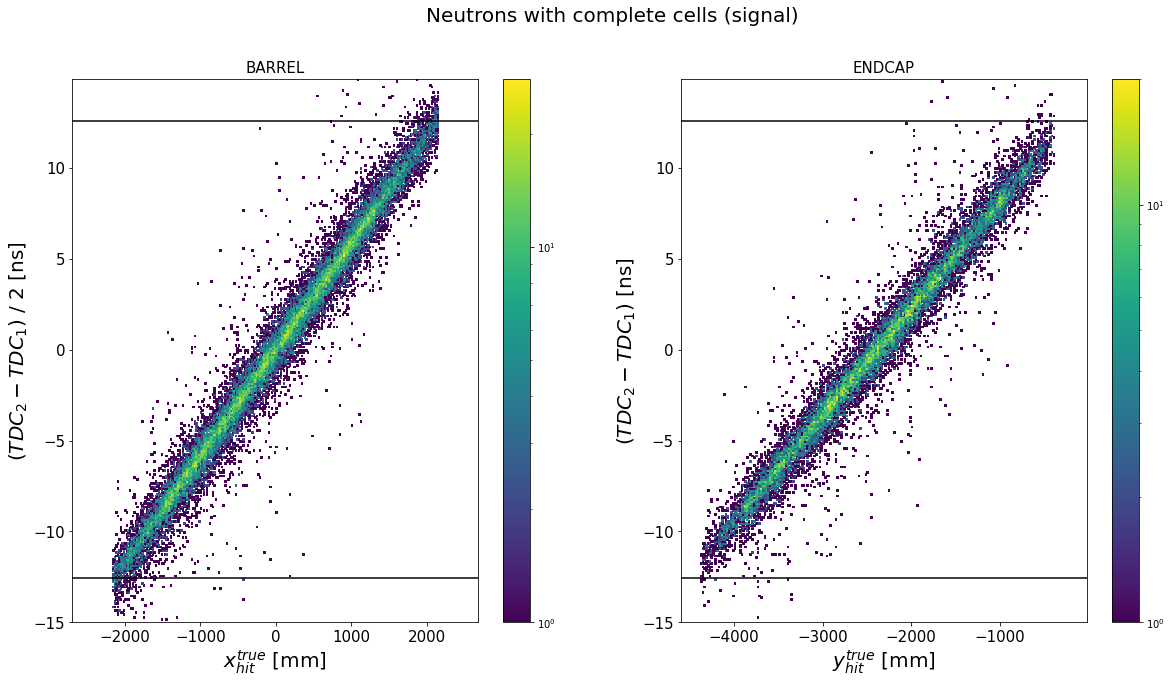

In [88]:
plotter = MultiPlotter(nrows=1, ncols=2, figsize=(20, 10), suptitle="Neutrons with complete cells (signal)")

L_cell = 4300 # mm
v_signal_in_fiber = 5.85/1e3 # ns/mm
max_tdc = L_cell / 2 * v_signal_in_fiber 

delta_tdc_over_2_barrel =  (fired_by_reconstructable_neutron.dataframe.query("Fired_Cells_mod < 30")['Fired_Cells_tdc2'] - fired_by_reconstructable_neutron.dataframe.query("Fired_Cells_mod < 30")['Fired_Cells_tdc1'])/2
delta_tdc_over_2_endcap =  (fired_by_reconstructable_neutron.dataframe.query("Fired_Cells_mod >= 30")['Fired_Cells_tdc2'] - fired_by_reconstructable_neutron.dataframe.query("Fired_Cells_mod >= 30")['Fired_Cells_tdc1'])/2

# First 2D histogram plot with logarithmic scale
plotter.plot_hist2d(
    x = fired_by_reconstructable_neutron.dataframe.query("Fired_Cells_mod < 30")['Fired_Cell_true_hit2_x'],
    y = delta_tdc_over_2_barrel,
    bins_x = np.arange(-2700, 2700, 20),
    bins_y = np.arange(-15, 15, 0.1),
    log_scale = True,
    xlabel = r'$x_{hit}^{true}$ [mm]',
    ylabel = r'$(TDC_2 - TDC_1)$ / 2 [ns]',
)

plotter.axes[plotter.current_ax].tick_params(axis='x', labelsize=15)
plotter.axes[plotter.current_ax].tick_params(axis='y', labelsize=15)
plotter.axes[plotter.current_ax].axhline(y = max_tdc, color = 'black')
plotter.axes[plotter.current_ax].axhline(y = -max_tdc, color = 'black')
plotter.axes[plotter.current_ax].set_title("BARREL", fontsize = 15)
plotter.next_plot()

plotter.plot_hist2d(
    x = fired_by_reconstructable_neutron.dataframe.query("Fired_Cells_mod >= 30")['Fired_Cell_true_hit2_y'],
    y = delta_tdc_over_2_endcap,
    bins_x = np.arange(-4600, 0, 20),
    bins_y = np.arange(-15, 15, 0.1),
    log_scale = True,
    xlabel = r'$y_{hit}^{true}$ [mm]',
    ylabel = r'$(TDC_2 - TDC_1)$ [ns]',
)

plotter.axes[plotter.current_ax].tick_params(axis='x', labelsize=15)
plotter.axes[plotter.current_ax].tick_params(axis='y', labelsize=15)
plotter.axes[plotter.current_ax].axhline(y = max_tdc, color = 'black')
plotter.axes[plotter.current_ax].axhline(y = -max_tdc, color = 'black')
plotter.axes[plotter.current_ax].set_title("ENDCAP", fontsize = 15)
plt.savefig("/storage/gpfs_data/neutrino/users/gi/sand-physics/notebook/figures/ECAL_reco/x_hit_true_vs_tdc_neutrons.pdf")

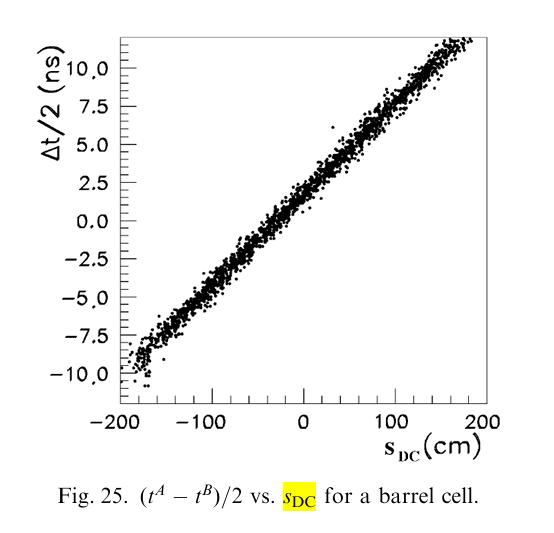

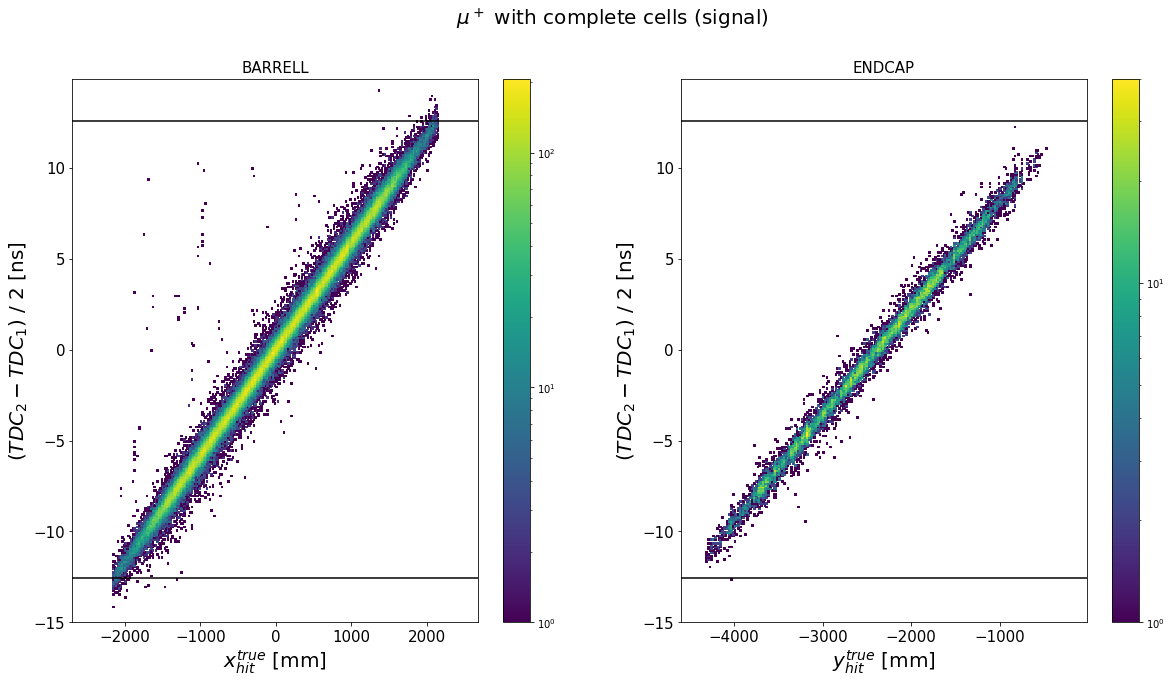

In [87]:
plotter = MultiPlotter(nrows=1, ncols=2, figsize=(20, 10), suptitle=r"$\mu^+$ with complete cells (signal)")

L_cell = 4300 # mm
v_signal_in_fiber = 5.85/1e3 # ns/mm
max_tdc = L_cell / 2 * v_signal_in_fiber 

delta_tdc_over_2_barrel =  (fired_by_antimuons.dataframe.query("Fired_Cells_mod < 30")['Fired_Cells_tdc2'] - fired_by_antimuons.dataframe.query("Fired_Cells_mod < 30")['Fired_Cells_tdc1'])/2
delta_tdc_over_2_endcap =  (fired_by_antimuons.dataframe.query("Fired_Cells_mod >= 30")['Fired_Cells_tdc2'] - fired_by_antimuons.dataframe.query("Fired_Cells_mod >= 30")['Fired_Cells_tdc1'])/2

# First 2D histogram plot with logarithmic scale
plotter.plot_hist2d(
    x = fired_by_antimuons.dataframe.query("Fired_Cells_mod < 30")['Fired_Cell_true_hit2_x'],
    y = delta_tdc_over_2_barrel,
    bins_x = np.arange(-2700, 2700, 20),
    bins_y = np.arange(-15, 15, 0.1),
    log_scale = True,
    xlabel = r'$x_{hit}^{true}$ [mm]',
    ylabel = r'$(TDC_2 - TDC_1)$ / 2 [ns]',
)

plotter.axes[plotter.current_ax].tick_params(axis='x', labelsize=15)
plotter.axes[plotter.current_ax].tick_params(axis='y', labelsize=15)
plotter.axes[plotter.current_ax].axhline(y = max_tdc, color = 'black')
plotter.axes[plotter.current_ax].axhline(y = -max_tdc, color = 'black')
plotter.axes[plotter.current_ax].set_title("BARRELL", fontsize=15)
plotter.next_plot()

plotter.plot_hist2d(
    x = fired_by_antimuons.dataframe.query("Fired_Cells_mod >= 30")['Fired_Cell_true_hit2_y'],
    y = delta_tdc_over_2_endcap,
    bins_x = np.arange(-4600, 0, 20),
    bins_y = np.arange(-15, 15, 0.1),
    log_scale = True,
    xlabel = r'$y_{hit}^{true}$ [mm]',
    ylabel = r'$(TDC_2 - TDC_1)$ / 2 [ns]',
)

plotter.axes[plotter.current_ax].tick_params(axis='x', labelsize=15)
plotter.axes[plotter.current_ax].tick_params(axis='y', labelsize=15)
plotter.axes[plotter.current_ax].axhline(y = max_tdc, color = 'black')
plotter.axes[plotter.current_ax].axhline(y = -max_tdc, color = 'black')
plotter.axes[plotter.current_ax].set_title("ENDCAP", fontsize=15)
plt.savefig("/storage/gpfs_data/neutrino/users/gi/sand-physics/notebook/figures/ECAL_reco/x_hit_true_vs_tdc_antimu.pdf")

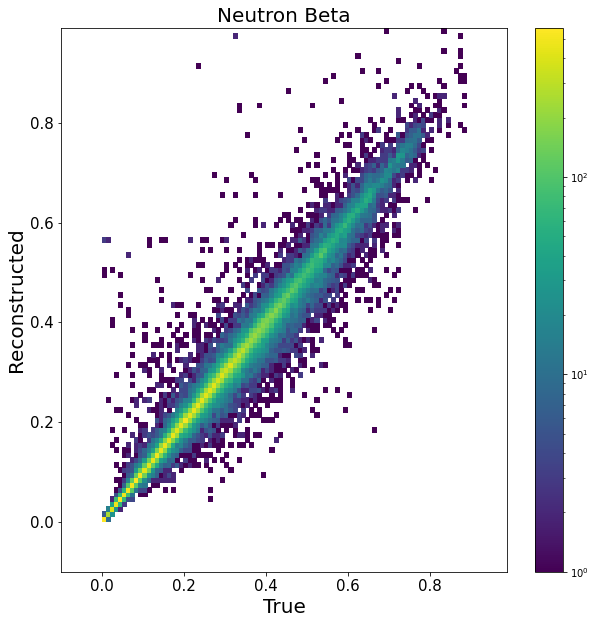

In [151]:
c = 299.792 # mm / ns
plotter = MultiPlotter(nrows=1, ncols=1, figsize=(10, 10))

# plotter.plot_hist2d(
#     x = fired_by_reconstructable_neutron.dataframe['True_FlightLength'],
#     y = fired_by_reconstructable_neutron.dataframe['Reconstructed_FlightLength'],
#     bins_x = np.arange(-0.1, 4500, 20),
#     bins_y = np.arange(-0.1, 4500, 20),
#     xlabel = r" | $\vec{x}_{vtx}-\vec{x}_{hit}^{true}$ | [mm]",
#     ylabel = r" | $\vec{x}_{vtx}-\vec{x}_{hit}^{reco}$ | [mm]",
#     log_scale = True,
# )

# plotter.axes[plotter.current_ax].tick_params(axis='x', labelsize=15)
# plotter.axes[plotter.current_ax].tick_params(axis='y', labelsize=15)
# # plotter.axes[plotter.current_ax].plot([0,6000],[0,6000], linestyle='--', color='red')
# plotter.axes[plotter.current_ax].set_title("Distance interaction vertex to hit in cell", fontsize = 20)

# plotter.next_plot()

# plotter.plot_hist2d(
#     x = fired_by_reconstructable_neutron.dataframe['Fired_Cell_true_Hit_t'],
#     y = fired_by_reconstructable_neutron.dataframe['Reconstructed_HitTime'] - 1,
#     bins_x = np.arange(0, 80, 1),
#     bins_y = np.arange(0, 80, 1),
#     xlabel = r"$t_{hit}^{true}$ [ns]",
#     ylabel = r"$t_{hit}^{reco}$",
#     log_scale = True,
# )

# plotter.axes[plotter.current_ax].plot([0,80],[0,80], linestyle='--', color='red')
# plotter.axes[plotter.current_ax].set_title("Time of Neutron hit in cell", fontsize = 20)

# plotter.next_plot()

plotter.plot_hist2d(
    # x = fired_by_reconstructable_neutron.AddInfo(other_sample=signal_neutrons_reconstructable_complete, variable='PrimariesBeta'),
    x = fired_by_reconstructable_neutron.dataframe['True_FlightLength']/((fired_by_reconstructable_neutron.dataframe['Fired_Cell_true_Hit_t'] ) * c),
    y = fired_by_reconstructable_neutron.dataframe['Reconstructed_FlightLength']/((fired_by_reconstructable_neutron.dataframe['Reconstructed_HitTime'] - 1) * c),
    bins_x = np.arange(-0.1, 1, 0.01),
    bins_y = np.arange(-0.1, 1, 0.01),
    xlabel = "True",
    ylabel = "Reconstructed",
    log_scale = True,
)

plotter.axes[plotter.current_ax].tick_params(axis='x', labelsize=15)
plotter.axes[plotter.current_ax].tick_params(axis='y', labelsize=15)
# plotter.axes[plotter.current_ax].plot([-1,60],[-1,60], linestyle='--', color='red')
plotter.axes[plotter.current_ax].set_title("Neutron Beta", fontsize = 20)

plt.savefig("/storage/gpfs_data/neutrino/users/gi/sand-physics/notebook/figures/ECAL_reco/beta_true_vs_reco_neutrons.pdf")



fwhm_x is :0.00530973451327435


Info in <TCanvas::Print>: pdf file /storage/gpfs_data/neutrino/users/gi/sand-physics/notebook/figures/ECAL_reco/beta_true_residuals_neutron.pdf has been created


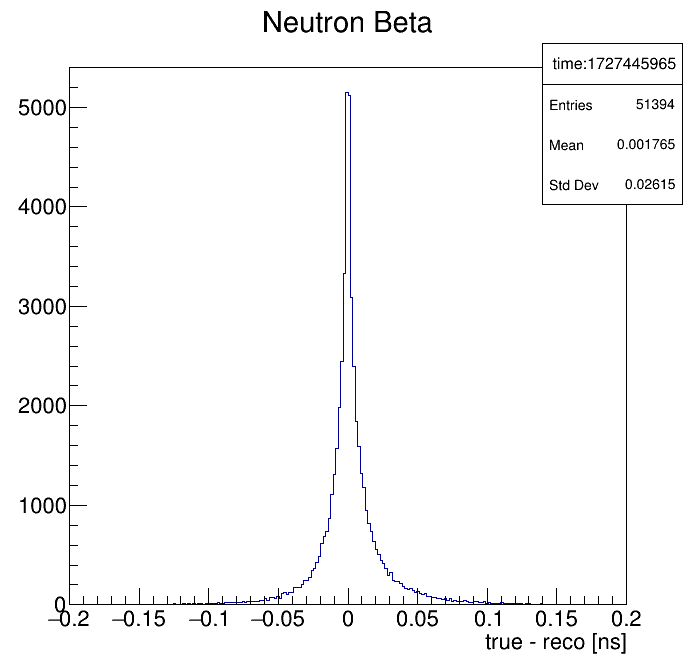

In [149]:
c = 299.792 # mm / ns
beta_true = fired_by_reconstructable_neutron.dataframe['True_FlightLength']/((fired_by_reconstructable_neutron.dataframe['Fired_Cell_true_Hit_t'] ) * c)
beta_reco = fired_by_reconstructable_neutron.dataframe['Reconstructed_FlightLength']/((fired_by_reconstructable_neutron.dataframe['Reconstructed_HitTime'] - 1) * c)

residuals_x = tool.FillTH1D(iterable = beta_true - beta_reco, 
                          histogram_name = "", 
                          title = "Neutron Beta; true - reco [ns]", 
                          nbins = int(np.sqrt(len(beta_true))),
                          #  nbins = 30,
                          x_min = -0.2, 
                          x_max = 0.2)

# residuals_y = tool.FillTH1D(iterable = fired_by_antimuons.dataframe.query("Fired_Cells_mod >= 30")['Fired_Cell_true_Hit_t'] + 1 - fired_by_antimuons.dataframe.query("Fired_Cells_mod >= 30")['Reconstructed_HitTime'], 
#                           histogram_name = "", 
#                           title = "Antimuons Hit Time (ENDCAP); true - reco [ns]", 
#                           nbins = int(np.sqrt(len(fired_by_antimuons.dataframe.query("Fired_Cells_mod >= 30")['Fired_Cell_true_hit1_t']))),
#                           #  nbins = 30,
#                           x_min = -2, 
#                           x_max = 2)


# residuals_x, mean_res_x, sigma_res_x = tool.FitTH1D_w_gauss(hist = residuals_x, 
#                                              gauss_range = (-2, 2), 
#                                              fit_range = (-1,1))

# residuals_y, mean_res_y, sigma_res_y = tool.FitTH1D_w_gauss(hist = residuals_y, 
#                                              gauss_range = (-2, 2), 
#                                              fit_range = (-1,1))

bin1_x = residuals_x.FindFirstBinAbove(residuals_x.GetMaximum()/2)
bin2_x = residuals_x.FindLastBinAbove(residuals_x.GetMaximum()/2)
fwhm_x = residuals_x.GetBinCenter(bin2_x) - residuals_x.GetBinCenter(bin1_x)

# bin1_y = residuals_y.FindFirstBinAbove(residuals_y.GetMaximum()/2)
# bin2_y = residuals_y.FindLastBinAbove(residuals_y.GetMaximum()/2)
# fwhm_y = residuals_y.GetBinCenter(bin2_y) - residuals_y.GetBinCenter(bin1_y)

print(f"fwhm_x is :{fwhm_x}")
# print(f"fwhm_y is :{fwhm_y}")


c = ROOT.TCanvas("canvas_name", "Canvas", 700, 700)
# c.Divide(2)

# c.cd(1)
ROOT.gStyle.SetOptFit(1011)
residuals_x.Draw()
c.Draw()

# c.cd(2)
# ROOT.gStyle.SetOptFit(1011)
# residuals_y.Draw()
# c.Draw()

c.SaveAs("/storage/gpfs_data/neutrino/users/gi/sand-physics/notebook/figures/ECAL_reco/beta_true_residuals_neutron.pdf")

Missing Transverse Momentum comparison C and C3H6


Text(0.5, 1.0, 'Missing Transverse Momentum : $p_T^m = |\\vec{p_T}^\\mu - \\vec{p_T}^H|$')

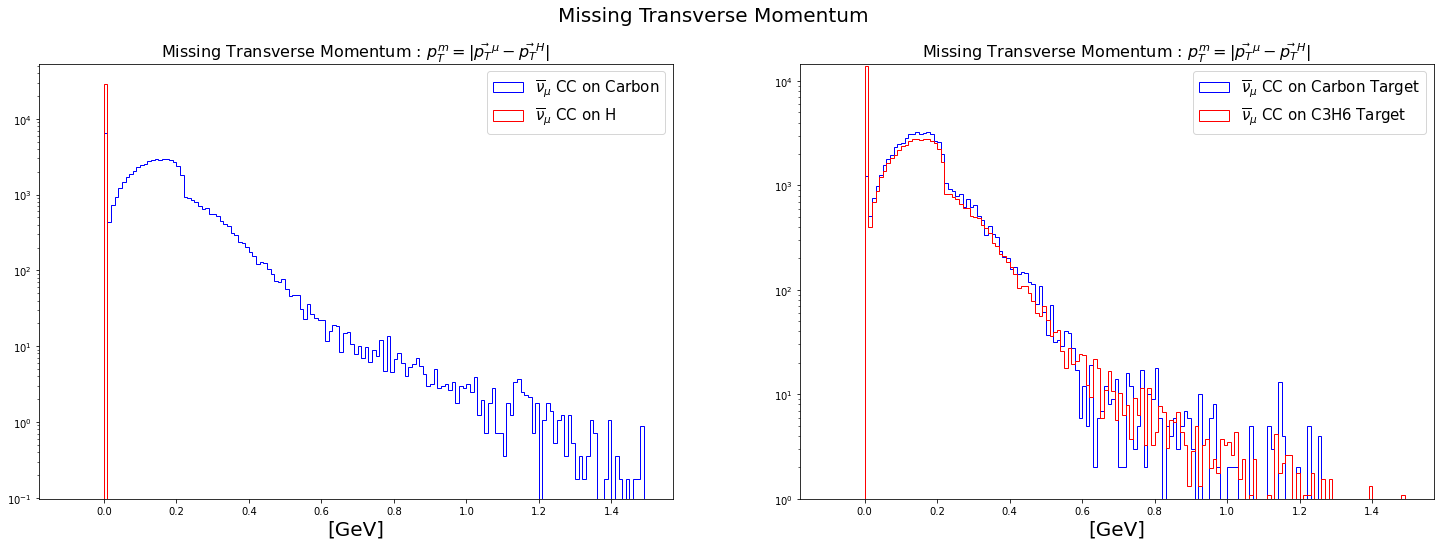

In [28]:
print("Missing Transverse Momentum comparison C and C3H6")
ratio_C12_H = 311685 / 55008
ratio_mass_target_C3H6_mass_target_C = 3.2 / 0.7

plotter = MultiPlotter(nrows=1, ncols=2, figsize=(25, 8), suptitle="Missing Transverse Momentum")

plotter.plot_hist(
    data=df[df.CCQEonHydrogen==0]['MissingTransverseMomentum'],
    bins=np.arange(-0.1,1.5,0.01),
    weights=np.ones(len(df[df.CCQEonHydrogen==0]['MissingTransverseMomentum'])) * (1/ratio_C12_H),
    color='blue',
    label=r'$\overline{\nu}_\mu$ CC on Carbon',
)

plotter.plot_hist(
    data=df[df.CCQEonHydrogen==1]['MissingTransverseMomentum'], 
    bins=np.arange(-0.1, 1.5, 0.01),
    color='red', 
    label=r'$\overline{\nu}_\mu$ CC on H',
    xlabel="[GeV]",
)

plotter.add_legend(labels=[r'$\overline{\nu}_\mu$ CC on Carbon', r'$\overline{\nu}_\mu$ CC on H'])
plotter.axes[plotter.current_ax].set_title(r"Missing Transverse Momentum : $p_T^m = |\vec{p_T}^\mu - \vec{p_T}^H|$", fontsize=16)
plotter.axes[plotter.current_ax].set_yscale("log")

plotter.next_plot()

plotter.plot_hist(
    data=df[df.InteractionVolume_short=='C_Target']['MissingTransverseMomentum'], 
    bins=np.arange(-0.1, 1.5, 0.01),
    color='blue', 
    label=r'$\overline{\nu}_\mu$ CC on Carbon Target'
)

plotter.plot_hist(
    data=df[df.InteractionVolume_short=='C3H6_Target']['MissingTransverseMomentum'], 
    bins=np.arange(-0.1, 1.5, 0.01),
    weights=np.ones(len(df[df.InteractionVolume_short=='C3H6_Target']['MissingTransverseMomentum'])) * (1 / ratio_mass_target_C3H6_mass_target_C),
    color='red', 
    label=r'$\overline{\nu}_\mu$ CC on C3H6 Target'
)

plotter.add_legend(labels=[r'$\overline{\nu}_\mu$ CC on Carbon Target', r'$\overline{\nu}_\mu$ CC on C3H6 Target'])
plotter.set_labels(xlabel="[GeV]")
plotter.set_limits(ylim=(1, None))  # For log scale y-axis
plotter.axes[plotter.current_ax].set_yscale("log")
plotter.axes[plotter.current_ax].set_title(r"Missing Transverse Momentum : $p_T^m = |\vec{p_T}^\mu - \vec{p_T}^H|$", fontsize=16)

all_hists.append(plotter)

In [193]:
fired_by_reconstructable_neutron.condition

'(isCellComplete==1 & who_produced_tdc1==1) & (CCQEonHydrogen==1 & PrimariesPDG==2112 & HasChangedDirection == 0 & IsECALHitMissing == 0)'

Neutron tof to ECAL (signal, complete cells) comparison: true, prediction, reconstructed


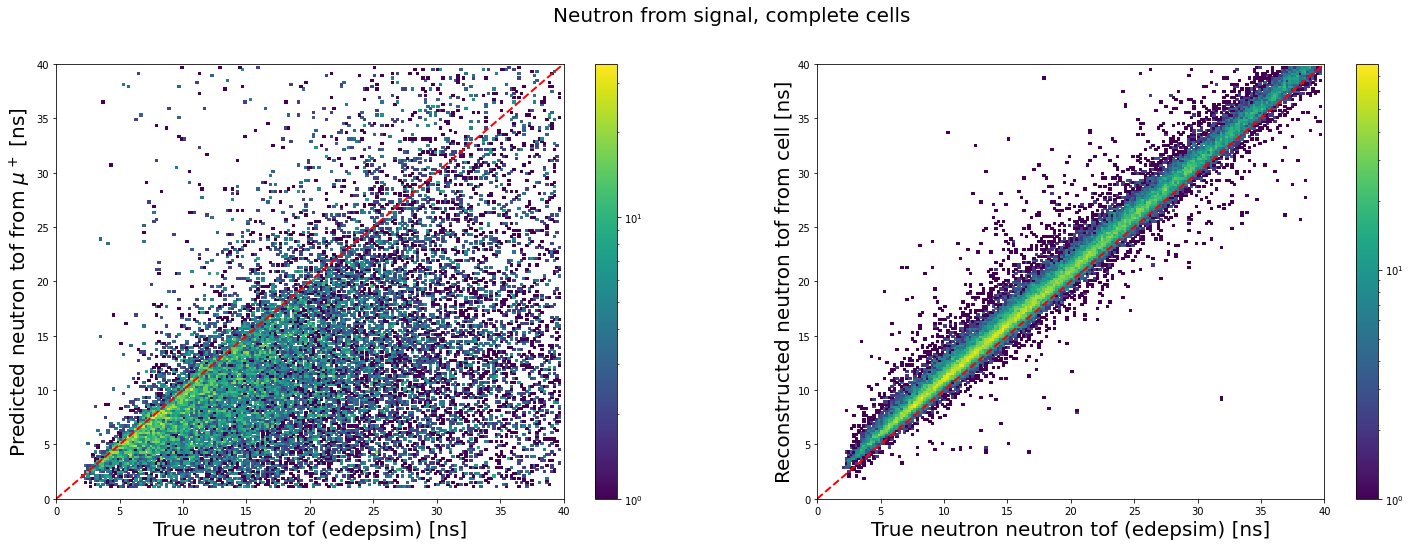

In [29]:
print("Neutron tof to ECAL (signal, complete cells) comparison: true, prediction, reconstructed")
plotter = MultiPlotter(nrows=1, ncols=2, figsize=(25, 8), suptitle="Neutron from signal, complete cells")

plotter.plot_hist2d(
    x = fired_by_reconstructable_neutron.dataframe['Fired_Cell_true_hit1_t'],
    y = fired_by_reconstructable_neutron.dataframe['ExpectedNeutronHit_t'],
    bins_x = np.arange(0,40,0.2),
    bins_y = np.arange(0,40,0.2),
    log_scale = True,
    # label='',
    xlabel = 'True neutron tof (edepsim) [ns]',
    ylabel = r'Predicted neutron tof from $\mu^+$ [ns]',
    xlim = [0,40],
    ylim = [0,40]
)

plotter.axes[plotter.current_ax].plot([0, 40], [0, 40], color='red', linestyle='--', linewidth=2)

plotter.next_plot()

plotter.plot_hist2d(
    x = fired_by_reconstructable_neutron.dataframe['Fired_Cell_true_hit1_t'],
    y = fired_by_reconstructable_neutron.dataframe['Cell_Reconstructed_hit_t'],
    bins_x = np.arange(0,40,0.2),
    bins_y = np.arange(0,40,0.2),
    log_scale = True,
    xlabel = 'True neutron neutron tof (edepsim) [ns]',
    ylabel = 'Reconstructed neutron tof from cell [ns]',
    xlim = [0,40],
    ylim = [0,40]
)

plotter.axes[plotter.current_ax].plot([0, 40], [0, 40], color='red', linestyle='--', linewidth=2)

all_hists.append(plotter)

In [22]:
signal_neutrons_reconstructable_complete.dataframe.columns

Index(['entry', 'EventId', 'EventType', 'CCQEonHydrogen', 'Interaction_vtxX',
       'Interaction_vtxY', 'Interaction_vtxZ', 'Interaction_vtxT',
       'PrimariesPDG', 'PrimariesP4_x', 'PrimariesP4_y', 'PrimariesP4_z',
       'PrimariesP4_t', 'PrimariesFirstHitECAL_x', 'PrimariesFirstHitECAL_y',
       'PrimariesFirstHitECAL_z', 'PrimariesFirstHitECAL_t',
       'PrimariesEDepECAL', 'PrimariesEmissionAngle', 'IsECALHitMissing',
       'DeviationAngle', 'HasChangedDirection', 'dist_Vtx2ECAL', 'mass',
       'E_kin', 'gamma', 'beta'],
      dtype='object')

In [ ]:
df

Text(0.5, 1.0, '$\\mu^+$ tof true - reco')

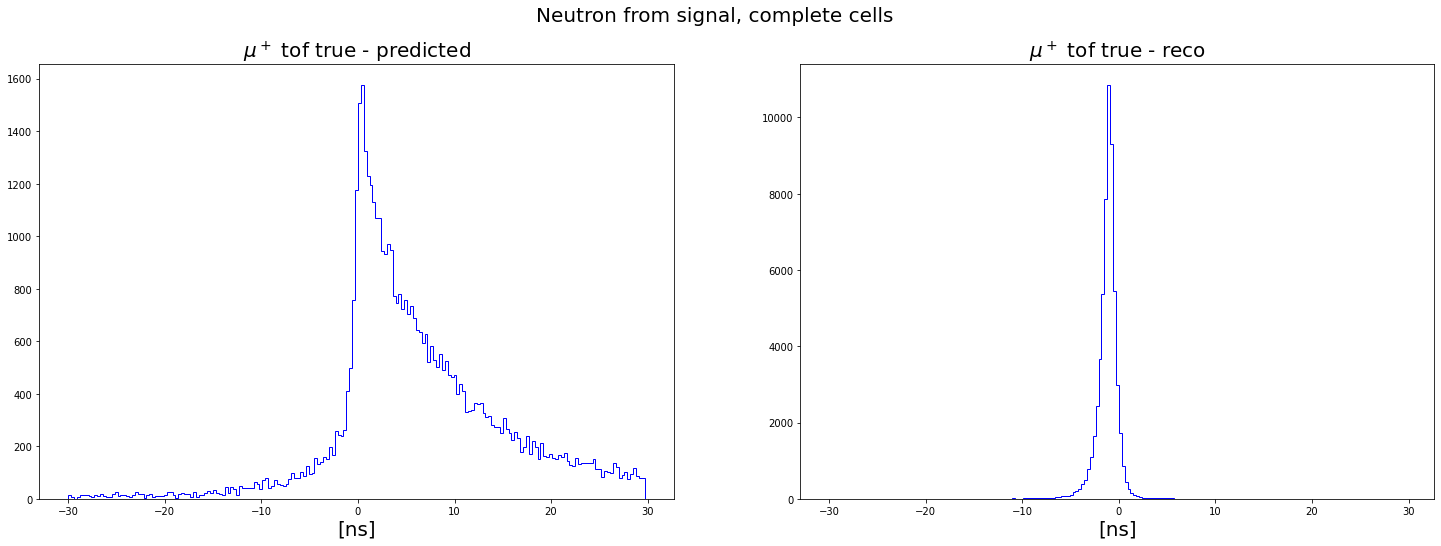

In [30]:
plotter = MultiPlotter(nrows=1, ncols=2, figsize=(25, 8), suptitle="Neutron from signal, complete cells")

plotter.plot_hist(
    fired_by_reconstructable_neutron.dataframe['Fired_Cell_true_hit1_t'] - fired_by_reconstructable_neutron.dataframe['ExpectedNeutronHit_t'],
    bins = np.arange(-30,30,0.3),
    xlabel = "[ns]",
)

plotter.axes[plotter.current_ax].set_title(r"$\mu^+$ tof true - predicted", fontsize = 20)

plotter.next_plot()

plotter.plot_hist(
    fired_by_reconstructable_neutron.dataframe['Fired_Cell_true_hit1_t'] - fired_by_reconstructable_neutron.dataframe['Cell_Reconstructed_hit_t'],
    bins = np.arange(-30,30,0.3),
    xlabel = "[ns]",
)
plotter.axes[plotter.current_ax].set_title(r"$\mu^+$ tof true - reco", fontsize = 20)


In [188]:
fired_by_antimuons.condition

'(isCellComplete==1 & who_produced_tdc1==0) & ((CCQEonHydrogen==1 & PrimariesPDG==-13) & (isCellComplete==1 & who_produced_tdc1==0))'

Muon tof to ECAL (signal, complete cells) comparison: true, reconstructed


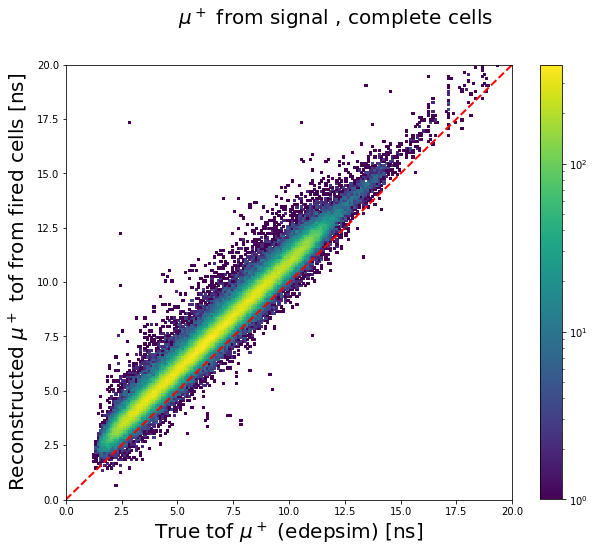

In [31]:
print("Muon tof to ECAL (signal, complete cells) comparison: true, reconstructed")
plotter = MultiPlotter(nrows=1, ncols=1, figsize=(10, 8), suptitle=r"$\mu^+$ from signal , complete cells")

plotter.plot_hist2d(
    x = fired_by_antimuons.dataframe['Fired_Cell_true_hit1_t'],
    y = fired_by_antimuons.dataframe['Cell_Reconstructed_hit_t'],
    bins_x = np.arange(0, 50, 0.1),
    bins_y = np.arange(0, 50, 0.1),
    log_scale = True,
    xlabel = r'True tof $\mu^+$ (edepsim) [ns]',
    ylabel = r'Reconstructed $\mu^+$ tof from fired cells [ns]',
    xlim = [0,20],
    ylim = [0,20],
)

plotter.axes[plotter.current_ax].plot([0, 20], [0, 20], color='red', linestyle='--', linewidth=2)

all_hists.append(plotter)

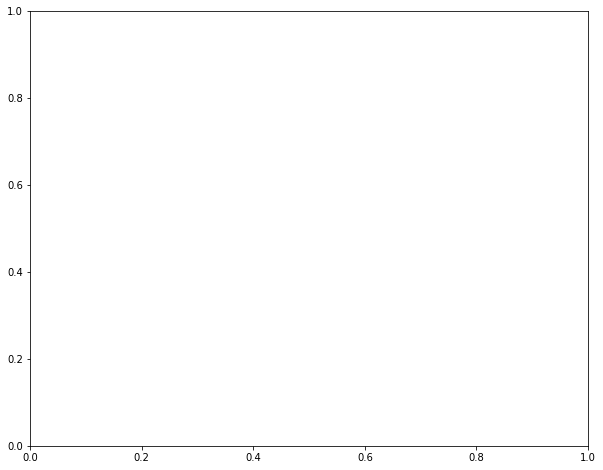

In [161]:
MultiPlotter().save_multiple_figures_to_pdf('/storage/gpfs_data/neutrino/users/gi/sand-physics/scratch/multiple_plots.pdf', all_hists)

# Checks on reconstructed hit

# Check:
check neutron expected hit position in similare to neutron first hit from edepsim

how many times neutron changes its direction on the way to ECAL?

For neutrons that haven't changed their initial directions, how good i am in predicting the tof and the arrival position to the ECAL?

prediction on arrival point in the ECAL

In [32]:
tscin = 3.08
tscex = 0.588

# Generazione di numeri casuali uniformi e calcolo di tdec
random_uniform_values = np.random.uniform(size=10000)  # Genera 10000 valori casuali
tdec_values = tscin * np.power(1. / random_uniform_values - 1., tscex)

# Calcolo del valore medio
mean_tdec = np.mean(tdec_values)

print("Mean value of tdec:", mean_tdec)

Mean value of tdec: 5.654763449348679


 FCN=112.893 FROM MIGRAD    STATUS=CONVERGED      66 CALLS          67 TOTAL
                     EDM=4.84837e-10    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     4.77115e+02   1.12124e+01   4.16296e-02   3.31047e-06
   2  Mean         3.25067e+00   1.68462e+00   8.77404e-03   6.27317e-06
   3  Sigma        9.58742e+01   1.73831e+00   2.28419e-05   6.20946e-03
 FCN=132.383 FROM MIGRAD    STATUS=CONVERGED      65 CALLS          66 TOTAL
                     EDM=6.0117e-07    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     3.97574e+02   1.05020e+01   4.14870e-02  -5.69923e-05
   2  Mean        -4.30246e+00   2.00948e+00   1.13235e-02  -2.22437e-04
   3  Sigma        1.03980e+02   2

Warning in <TROOT::Append>: Replacing existing TH1:  time:1726522953 (Potential memory leak).
Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas_name


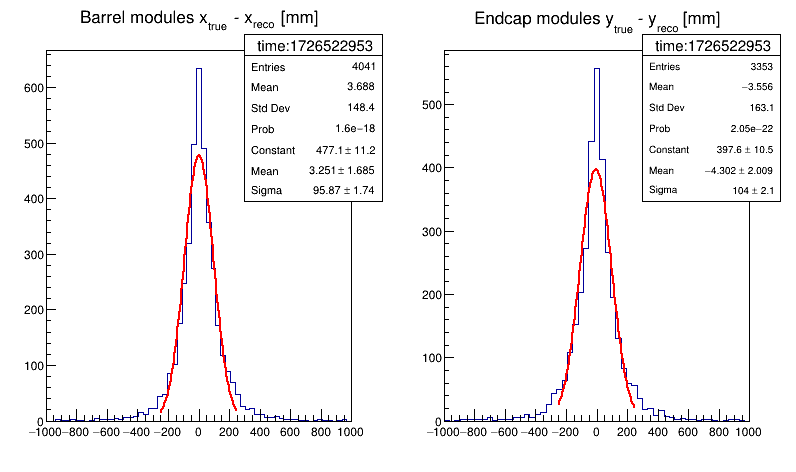

In [63]:
residuals_x = tool.FillTH1D(iterable = neutron_signal_complete_fired_cells_barrels.True_hit1_x - neutron_signal_complete_fired_cells_barrels.hit_reco_x.values, 
                          histogram_name = "", 
                          title = r"Barrel modules x_{true} - x_{reco} [mm]", 
                          nbins = int(np.sqrt(len(neutron_signal_complete_fired_cells_barrels))),
                          #  nbins = 30,
                          x_min = -1000, 
                          x_max = 1000)

residuals_y = tool.FillTH1D(iterable = neutron_signal_complete_fired_cells_encaps.True_hit1_y - neutron_signal_complete_fired_cells_encaps.hit_reco_y.values, 
                          histogram_name = "", 
                          title = r"Endcap modules y_{true} - y_{reco} [mm]", 
                          nbins = int(np.sqrt(len(neutron_signal_complete_fired_cells_encaps))),
                          #  nbins = 30,
                          x_min = -1000, 
                          x_max = 1000)

residuals_x_hist, mean_res_x, sigma_res_x = tool.FitTH1D_w_gauss(hist = residuals_x, 
                                             gauss_range = (-1000, 1000), 
                                             fit_range = (-250,250))

residuals_y_hist, mean_res_y, sigma_res_y = tool.FitTH1D_w_gauss(hist = residuals_y, 
                                             gauss_range = (-1000, 1000), 
                                             fit_range = (-250,250))

c = ROOT.TCanvas("canvas_name", "Canvas", 800, 500)
c.Divide(2)

c.cd(1)
ROOT.gStyle.SetOptFit(1011)
residuals_x_hist.Draw()
c.Draw()

c.cd(2)
ROOT.gStyle.SetOptFit(1011)
residuals_y_hist.Draw()
c.Draw()

 FCN=272.733 FROM MIGRAD    STATUS=CONVERGED      76 CALLS          77 TOTAL
                     EDM=1.28429e-08    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     3.85050e+02   1.08072e+01   5.72888e-02  -2.03156e-05
   2  Mean         3.00334e+00   1.91830e+00   1.54781e-02  -2.00003e-05
   3  Sigma        9.84704e+01   2.32755e+00   4.28095e-05  -2.75167e-02
 FCN=186.757 FROM MIGRAD    STATUS=CONVERGED      75 CALLS          76 TOTAL
                     EDM=1.83035e-09    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     2.83169e+02   8.83634e+00   3.86546e-02   9.72513e-06
   2  Mean        -3.45628e+00   2.75491e+00   1.84320e-02   7.52088e-06
   3  Sigma        1.22589e+02   

Warning in <TROOT::Append>: Replacing existing TH1:  time:1726523113 (Potential memory leak).
Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas_name


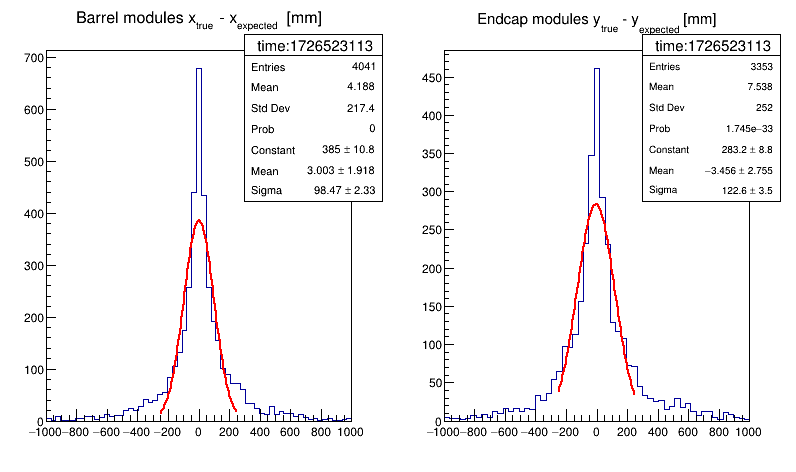

In [65]:
residuals_x = tool.FillTH1D(iterable = neutron_signal_complete_fired_cells_barrels.True_hit1_x - neutron_signal_complete_fired_cells_barrels.ExpectedNeutronHit_x, 
                          histogram_name = "", 
                          title = r"Barrel modules x_{true} - x_{expected} [mm]", 
                          nbins = int(np.sqrt(len(neutron_signal_complete_fired_cells_barrels))),
                          #  nbins = 30,
                          x_min = -1000, 
                          x_max = 1000)

residuals_y = tool.FillTH1D(iterable = neutron_signal_complete_fired_cells_encaps.True_hit1_y - neutron_signal_complete_fired_cells_encaps.ExpectedNeutronHit_y, 
                          histogram_name = "", 
                          title = r"Endcap modules y_{true} - y_{expected} [mm]", 
                          nbins = int(np.sqrt(len(neutron_signal_complete_fired_cells_encaps))),
                          #  nbins = 30,
                          x_min = -1000, 
                          x_max = 1000)

residuals_x_hist, mean_res_x, sigma_res_x = tool.FitTH1D_w_gauss(hist = residuals_x, 
                                             gauss_range = (-1000, 1000), 
                                             fit_range = (-250,250))

residuals_y_hist, mean_res_y, sigma_res_y = tool.FitTH1D_w_gauss(hist = residuals_y, 
                                             gauss_range = (-1000, 1000), 
                                             fit_range = (-250,250))

c = ROOT.TCanvas("canvas_name", "Canvas", 800, 500)
c.Divide(2)

c.cd(1)
ROOT.gStyle.SetOptFit(1011)
residuals_x_hist.Draw()
c.Draw()

c.cd(2)
ROOT.gStyle.SetOptFit(1011)
residuals_y_hist.Draw()
c.Draw()

In [57]:
neutron_signal_complete_fired_cells.columns

Index(['CCQEonHydrogen', 'Fired_Cells_mod', 'Fired_Cells_id', 'Fired_Cells_x',
       'Fired_Cells_y', 'Fired_Cells_z', 'isCellComplete', 'Fired_Cells_tdc1',
       'who_produced_tdc1', 'Fired_Cells_tdc2', 'who_produced_tdc2',
       'True_hit1_x', 'True_hit1_y', 'True_hit1_z', 'True_hit1_t',
       'True_hit2_x', 'True_hit2_y', 'True_hit2_z', 'True_hit2_t',
       'hit_reco_x', 'hit_reco_y', 'hit_reco_z', 'hit_reco_t',
       'ExpectedNeutronHit_x', 'ExpectedNeutronHit_y', 'ExpectedNeutronHit_z',
       'ExpectedNeutronHit_t', 'ExpectedFiredModuleByNeutron'],
      dtype='object')

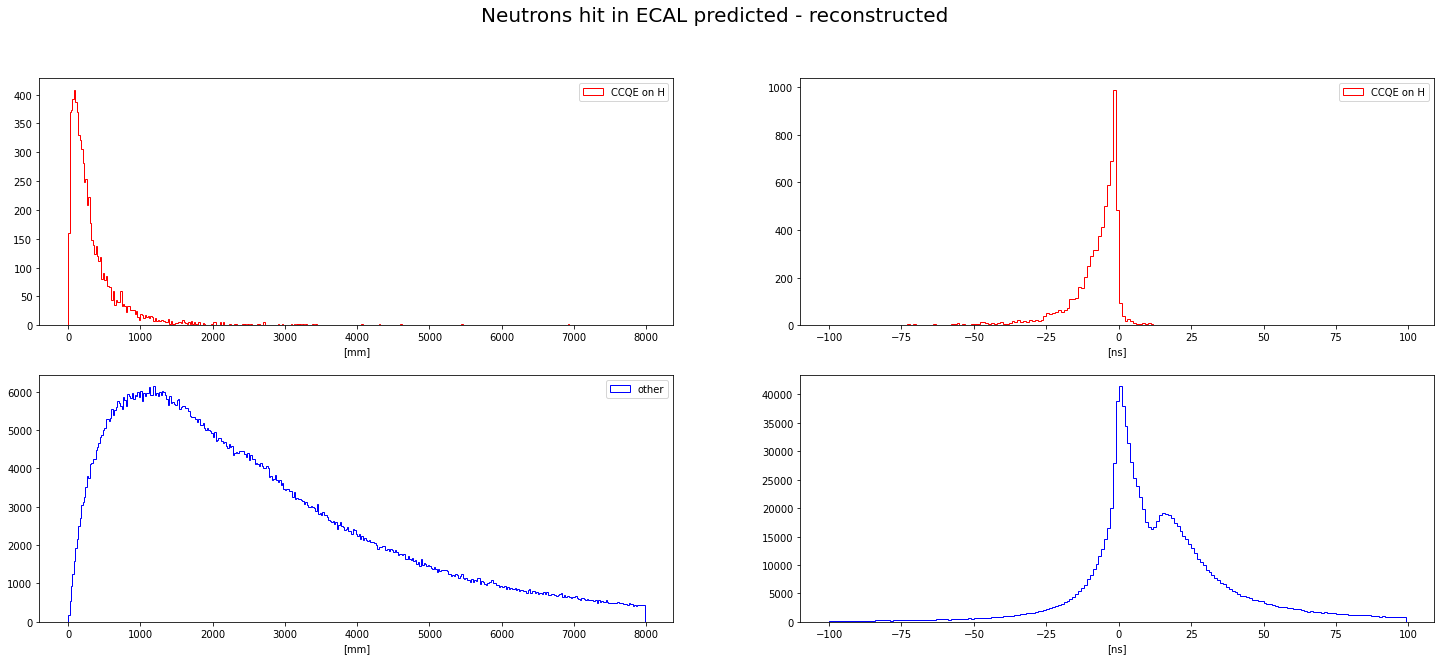

In [28]:
plotter = MultiPlotter(nrows=2, ncols=2, figsize=(25,10), suptitle="Neutrons hit in ECAL predicted - reconstructed")

plotter.plot_hist(
    data = neutron_signal_complete_fired_cells[neutron_signal_complete_fired_cells.CCQEonHydrogen==1].space_residuals,
    bins = np.arange(0, 8000, 20),
    label = "CCQE on H",
    color = "red",
    xlabel = "[mm]",
    ylabel = "",
    # ticks = [np.arange(0,8000,500)],
)

plotter.next_plot(plot_legend=True)

plotter.plot_hist(
    data = neutron_signal_complete_fired_cells[neutron_signal_complete_fired_cells.CCQEonHydrogen==1].time_residuals,
    bins = np.arange(-100, 100, 1),
    label = "CCQE on H",
    color = "red",
    xlabel = "[ns]",
    ylabel = "",
    # ticks = [np.arange(-100, 100, 1)],
)

plotter.next_plot(plot_legend=True)

plotter.plot_hist(
    data = fired_cells[fired_cells.CCQEonHydrogen==0].space_residuals,
    bins = np.arange(0, 8000, 20),
    label = "other",
    color = "blue",
    xlabel = "[mm]",
    ylabel = "",
    # ticks = [np.arange(0,8000,500)],
)

plotter.next_plot(plot_legend=True)

plotter.plot_hist(
    data = fired_cells[fired_cells.CCQEonHydrogen==0].time_residuals,
    bins = np.arange(-100, 100, 1),
    label = "other",
    color = "blue",
    xlabel = "[ns]",
    ylabel = "",
    # ticks = [np.arange(-100, 100, 1)],
)

prediction on the tof in ECAL

# Select signal

In [19]:
print(f"Number of all events signal (truth) {len(df_signal)}")
print(f"Number of all events background (truth) {len(df[df.CCQEonHydrogen==0])}")

Number of all events signal (truth) 2912
Number of all events background (truth) 35725


Select events with charge multiplicity == 1

In [25]:
df_1cp = df[df.NofFinalStateChargedParticles==1]
index_event_1cp = df_1cp.index.get_level_values(0)
primaries_1cp = primaries.loc[index_event_1cp]
# ci sono eventi che non alcuna cella del calorimetro accesa
common_indices = df_1cp.index.intersection(fired_cells.index)
fired_cells_events1cp = fired_cells.loc[common_indices]
fired_cells_events1cp

CCQEonHydrogen  \
FileName                                           EventId                   
events-in-SANDtracker.0.gtrac.root:gRooTracker:3   3                     0   
                                                   3                     0   
                                                   3                     0   
                                                   3                     0   
                                                   3                     0   
...                                                                    ...   
events-in-SANDtracker.99.gtrac.root:gRooTracker... 999                   1   
                                                   999                   1   
                                                   999                   1   
                                                   999                   1   
                                                   999                   1   

                                                            Fired_Cells_mod  \
FileName                                           EventId                    
events-in-SANDtracker.0.gtrac.root:gRooTracker:3   3                     15   
                                                   3                     15   
                                                   3                     15   
                                                   3                     15   
                                                   3                     15   
...                                                                     ...   
events-in-SANDtracker.99.gtrac.root:gRooTracker... 999                   15   
                                                   999                   15   
                                                   999                   15   
                                                   999                   15   
                                                   999                   15   

                                                            Fired_Cells_id  \
FileName                                           EventId                   
events-in-SANDtracker.0.gtrac.root:gRooTracker:3   3                215002   
                                                   3                215003   
                                                   3                215100   
                                                   3                215103   
                                                   3                215104   
...                                                                    ...   
events-in-SANDtracker.99.gtrac.root:gRooTracker... 999              215203   
                                                   999              215302   
                                                   999              215303   
                                                   999              215403   
                                                   999              215404   

                                                            Fired_Cells_x  \
FileName                                           EventId                  
events-in-SANDtracker.0.gtrac.root:gRooTracker:3   3        -3.320746e-13   
                                                   3        -3.320746e-13   
                                                   3        -3.320746e-13   
                                                   3        -3.320746e-13   
                                                   3        -3.320746e-13   
...                                                                   ...   
events-in-SANDtracker.99.gtrac.root:gRooTracker... 999      -3.320746e-13   
                                                   999      -3.320746e-13   
                                                   999      -3.320746e-13   
                                                   999      -3.320746e-13   
                                                   999      -3.320746e-13   



For the selected cut how many signal and background events? What are the efficiency of the cut and purity of the selected sample?

In [26]:
nof_events_1cp = len(df_1cp)
nof_signal_events_1cp = len(df_1cp[df_1cp.CCQEonHydrogen==1])
print(f"Number of events signal (truth) {nof_signal_events_1cp}, selection efficiency {nof_signal_events_1cp / tot_nof_neutrons_signal}, purity {nof_signal_events_1cp / nof_events_1cp}")
print(f"Number of events background (truth) {nof_events_1cp - nof_signal_events_1cp}")

Number of events signal (truth) 2912, selection efficiency 1.0, purity 0.21064814814814814
Number of events background (truth) 10912


Which events have 1 final state charged particle but are not signal?

Text(204.0, 0.5, 'Interaction Target')

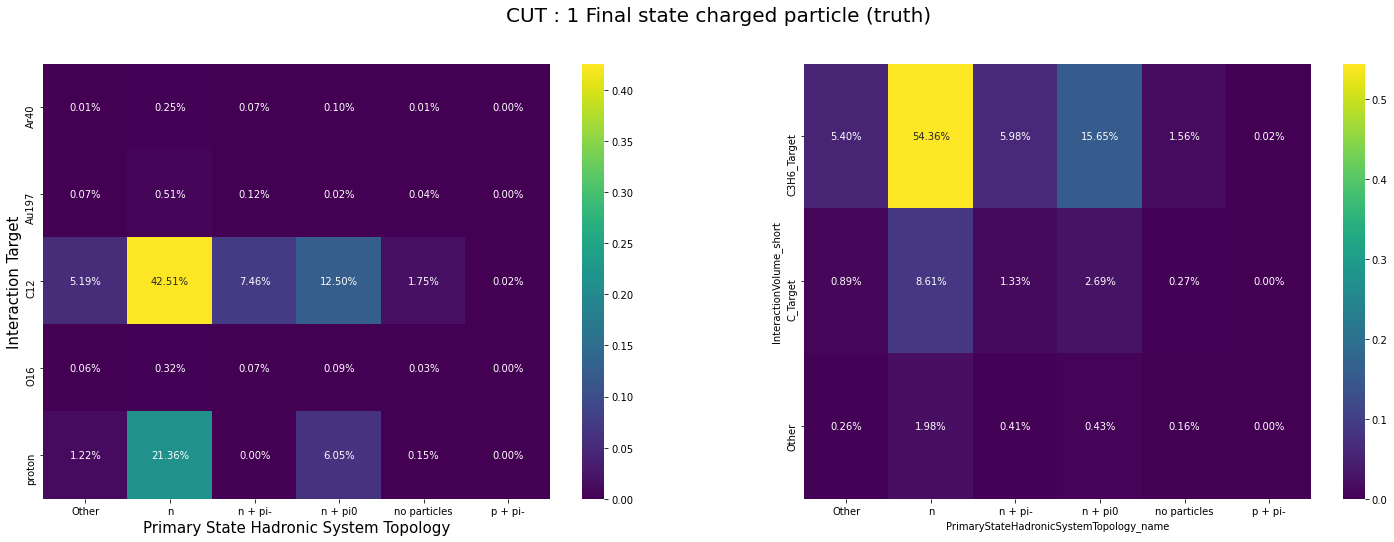

In [27]:
fig, ax = plt.subplots(1,2, figsize=(25, 8))

pivot_table_1cp = df_1cp.pivot_table(
    index='InteractionTarget',
    columns='PrimaryStateHadronicSystemTopology_name',
    values='NofFinalStateChargedParticles',
    aggfunc='count',
    fill_value=0
)

pivot_table_1cp_ = df_1cp.pivot_table(
    index='InteractionVolume_short',
    columns='PrimaryStateHadronicSystemTopology_name',
    values='NofFinalStateChargedParticles',
    aggfunc='count',
    fill_value=0
)

sns.heatmap(pivot_table_1cp/len(df_1cp), annot=True, fmt=".2%", cmap="viridis", ax=ax[0])

sns.heatmap(pivot_table_1cp_/len(df_1cp), annot=True, fmt=".2%", cmap="viridis", ax=ax[1])

plt.suptitle('CUT : 1 Final state charged particle (truth)', fontsize=20)
ax[0].set_xlabel('Primary State Hadronic System Topology', fontsize=15)
ax[0].set_ylabel('Interaction Target', fontsize=15)

(array([0.5, 1.5, 2.5, 3.5, 4.5]),
 [Text(0, 0.5, 'Ar40'),
  Text(0, 1.5, 'Au197'),
  Text(0, 2.5, 'C12'),
  Text(0, 3.5, 'O16'),
  Text(0, 4.5, 'proton')])

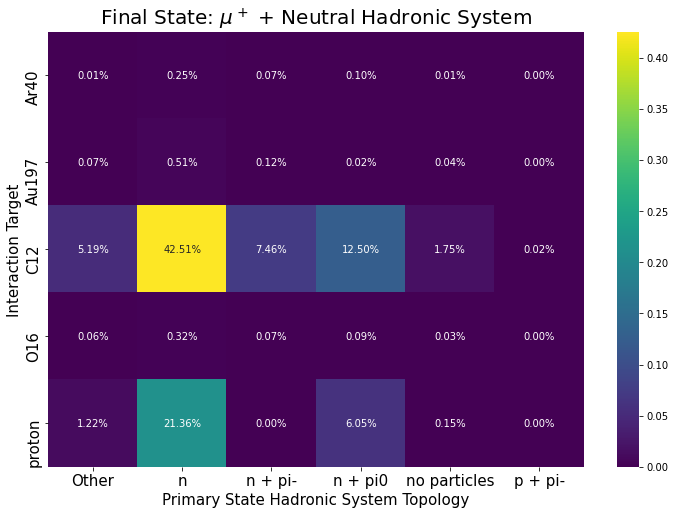

In [38]:
fig, ax = plt.subplots(figsize=(12, 8))

pivot_table_1cp = df_1cp.pivot_table(
    index='InteractionTarget',
    columns='PrimaryStateHadronicSystemTopology_name',
    values='NofFinalStateChargedParticles',
    aggfunc='count',
    fill_value=0
)

sns.heatmap(pivot_table_1cp/len(df_1cp), annot=True, fmt=".2%", cmap="viridis")

plt.title(r'Final State: $\mu^+$ + Neutral Hadronic System', fontsize=20)
ax.set_xlabel('Primary State Hadronic System Topology', fontsize=15)
ax.set_ylabel('Interaction Target', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

Possible backgrounds : 
- CCQE on C :
    - $\overline{\nu}+p\rightarrow \mu^+ + n$

- CCRES on C:
    - $\overline{\nu}+n \rightarrow \mu^+ + \Delta^- \rightarrow \mu^+ + n + \pi^-$ 
    - $\overline{\nu}+p \rightarrow \mu^+ + \Delta^0 \rightarrow \mu^+ + n + \pi^0$ ($\pi^0$ absorbed or 2 photons )

- CCRES on H:
    - $\overline{\nu}+p \rightarrow \mu^+ + \Delta^0 \rightarrow \mu^+ + n + \pi^0$

For the selected events, let's look at the kinematic

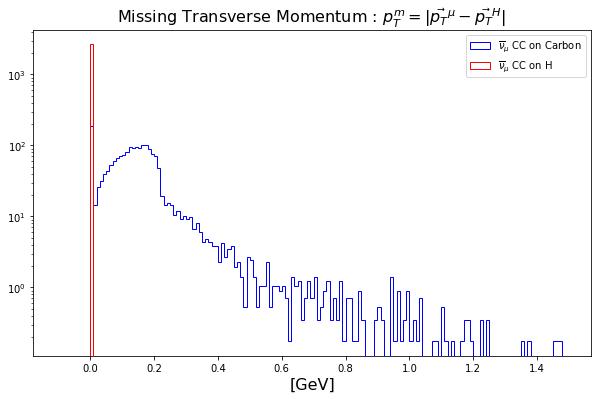

In [56]:
ratio_C12_H = 311685 / 55008

fig, ax = plt.subplots(figsize=(10, 6))

plt.hist(x=df_1cp[df_1cp.CCQEonHydrogen==0]['MissingTransverseMomentum'], 
         weights=np.array([1/ratio_C12_H for i in range(len(df_1cp[df_1cp.CCQEonHydrogen==0]['MissingTransverseMomentum']))]),
         bins=np.arange(-0.1,1.5,0.01), 
         histtype='step', color = 'blue', label=r'$\overline{\nu}_\mu$ CC on Carbon')

plt.hist(x=df_1cp[df_1cp.CCQEonHydrogen==1]['MissingTransverseMomentum'], 
         bins=np.arange(-0.1,1.5,0.01), 
         histtype='step', color = 'red', label=r'$\overline{\nu}_\mu$ CC on H')

plt.legend()

plt.title(r"Missing Transverse Momentum : $p_T^m = |\vec{p_T}^\mu - \vec{p_T}^H|$", fontsize=16)
plt.xlabel("[GeV]", fontsize=16)

plt.yscale("log")

Main source of background is CCQE events on C. For these evens we expect the kinematic to be different, namely the neutron should have a different beta because of the fermi motion

Of the remaining sample os signal, how many times my prediction on the arrival point in the ECAL and its tof is correct?

I need to find a cut on the space to define a "coincidence" between predicted hit in ECAL and reconstructed hits form cells

In [30]:
df_signal_left = df_1cp[df_1cp.CCQEonHydrogen==1]
df_bkg_left = df_1cp[df_1cp.CCQEonHydrogen==0]

How many time an event that has the expected fired module has also a reconstructed time compaticble with the expected tof?

In [31]:
complete_fired_cells_1cp = fired_cells_events1cp[fired_cells_events1cp.isCellComplete==1]
incomplete_fired_cells_1cp = fired_cells_events1cp[fired_cells_events1cp.isCellComplete==0]

In [32]:
selected_events_complete_fired_cells_1cp =  complete_fired_cells_1cp[
    (complete_fired_cells_1cp.Fired_Cells_mod == complete_fired_cells_1cp.ExpectedFiredModuleByNeutron) &
    (complete_fired_cells_1cp.space_residuals <= 250) & 
    (abs(complete_fired_cells_1cp.time_residuals) <= 10)
    ]

In [55]:
selected_events_complete_fired_cells_1cp

CCQEonHydrogen  \
FileName                                           EventId                   
events-in-SANDtracker.0.gtrac.root:gRooTracker:61  61                    1   
events-in-SANDtracker.0.gtrac.root:gRooTracker:105 105                   1   
events-in-SANDtracker.0.gtrac.root:gRooTracker:161 161                   1   
events-in-SANDtracker.0.gtrac.root:gRooTracker:228 228                   0   
events-in-SANDtracker.0.gtrac.root:gRooTracker:348 348                   1   
...                                                                    ...   
events-in-SANDtracker.99.gtrac.root:gRooTracker... 765                   1   
events-in-SANDtracker.99.gtrac.root:gRooTracker... 808                   0   
                                                   808                   0   
                                                   808                   0   
events-in-SANDtracker.99.gtrac.root:gRooTracker... 812                   0   

                                                            Fired_Cells_mod  \
FileName                                           EventId                    
events-in-SANDtracker.0.gtrac.root:gRooTracker:61  61                    18   
events-in-SANDtracker.0.gtrac.root:gRooTracker:105 105                    0   
events-in-SANDtracker.0.gtrac.root:gRooTracker:161 161                   15   
events-in-SANDtracker.0.gtrac.root:gRooTracker:228 228                   19   
events-in-SANDtracker.0.gtrac.root:gRooTracker:348 348                   15   
...                                                                     ...   
events-in-SANDtracker.99.gtrac.root:gRooTracker... 765                   40   
events-in-SANDtracker.99.gtrac.root:gRooTracker... 808                    1   
                                                   808                    1   
                                                   808                    1   
events-in-SANDtracker.99.gtrac.root:gRooTracker... 812                   15   

                                                            Fired_Cells_id  \
FileName                                           EventId                   
events-in-SANDtracker.0.gtrac.root:gRooTracker:61  61               218102   
events-in-SANDtracker.0.gtrac.root:gRooTracker:105 105              200204   
events-in-SANDtracker.0.gtrac.root:gRooTracker:161 161              215210   
events-in-SANDtracker.0.gtrac.root:gRooTracker:228 228              219406   
events-in-SANDtracker.0.gtrac.root:gRooTracker:348 348              215008   
...                                                                    ...   
events-in-SANDtracker.99.gtrac.root:gRooTracker... 765              140474   
events-in-SANDtracker.99.gtrac.root:gRooTracker... 808              201000   
                                                   808              201007   
                                                   808              201106   
events-in-SANDtracker.99.gtrac.root:gRooTracker... 812              215407   

                                                            Fired_Cells_x  \
FileName                                           EventId                  
events-in-SANDtracker.0.gtrac.root:gRooTracker:61  61       -1.042776e-28   
events-in-SANDtracker.0.gtrac.root:gRooTracker:105 105       4.696243e-13   
events-in-SANDtracker.0.gtrac.root:gRooTracker:161 161      -3.320746e-13   
events-in-SANDtracker.0.gtrac.root:gRooTracker:228 228       1.215477e-13   
events-in-SANDtracker.0.gtrac.root:gRooTracker:348 348      -3.320746e-13   
...                                                                   ...   
events-in-SANDtracker.99.gtrac.root:gRooTracker... 765      -1.893000e+03   
events-in-SANDtracker.99.gtrac.root:gRooTracker... 808       4.536223e-13   
                                                   808       4.536223e-13   
                                                   808       4.536223e-13   
events-in-SANDtracker.99.gtrac.root:gRooTracker... 812      -3.320746e-13   



In [34]:
selected_file_names = selected_events_complete_fired_cells_1cp.index.get_level_values(0).unique()

# Create a boolean mask using the 'FileName' level of df_1cp's index
mask = df_1cp.index.get_level_values(0).isin(selected_file_names)

# Use the mask to select the corresponding rows
selected_events = df_1cp[mask]

# Display the selected events
selected_events

,,EventType,CCQEonHydrogen,Interaction_vtxX,Interaction_vtxY,Interaction_vtxZ,InteractionTarget,InteractionVolume,PrimaryStateHadronicSystemTopology_name,NofFinalStateChargedParticles,PrimaryStateHadronicSystemTotalKinE,...,ExpectedNeutronArrivalPositionECALfY,ExpectedNeutronArrivalPositionECALfZ,ExpectedFiredModuleByNeutron,InteractionVolume_short,dist_Vtx2ECAL,ExpectedHadronSystPtot,ExpectedNeutronE,ExpectedNeutronGamma,ExpectedNeutronBeta,ExpectedNeutronCrossingTimeECAL
FileName,EventId,,,,,,,,,,,,,,,,,,,,,
events-in-SANDtracker.0.gtrac.root:gRooTracker:61,61,QES,1,0.422471,-2.686012,24.264480,proton,C3H6Target_A,n,1,0.511221,...,-2550.012686,25976.808179,18,C3H6_Target,2655.789816,1105.446940,1450.791543,1.544109,0.761961,11.618219
events-in-SANDtracker.0.gtrac.root:gRooTracker:105,105,QES,1,1.459176,-1.017790,23.689375,proton,C3H6Target_A,n,1,0.047697,...,-277.521351,23969.107642,0,C3H6_Target,793.429860,303.158766,987.263087,1.050766,0.307070,8.612913
events-in-SANDtracker.0.gtrac.root:gRooTracker:161,161,QES,1,0.670199,-2.331946,24.266286,proton,C3H6Target_A,n,1,0.152955,...,-3743.958114,25527.805391,15,C3H6_Target,1906.123171,557.516720,1092.523711,1.162797,0.510302,12.450955
events-in-SANDtracker.0.gtrac.root:gRooTracker:228,228,RES,0,0.316472,-2.260742,25.355607,proton,C3H6Target_X1,n,1,2.179114,...,-2001.168538,25977.159986,19,C3H6_Target,738.305412,1582.475295,1840.383445,1.958760,0.859862,2.862109
events-in-SANDtracker.0.gtrac.root:gRooTracker:348,348,QES,1,-0.278116,-2.428885,24.157082,proton,C3H6Target_A,n,1,0.937701,...,-3731.778593,25534.783455,15,C3H6_Target,1967.930475,1625.231628,1877.274889,1.998025,0.865740,7.577067
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
events-in-SANDtracker.99.gtrac.root:gRooTracker:656,656,QES,0,1.477218,-2.416844,24.228469,C12,C3H6Target_A,n,1,0.577267,...,-2310.921252,24479.752079,30,C3H6_Target,403.618330,1059.112577,1415.804582,1.506872,0.748064,1.798502
events-in-SANDtracker.99.gtrac.root:gRooTracker:665,665,DIS,0,0.374366,-0.851021,24.451585,C12,C3H6Target_B,n + pi0,1,2.254204,...,-523.238813,24833.501944,22,C3H6_Target,680.930258,760.027311,1208.480318,1.286212,0.628912,3.609041
events-in-SANDtracker.99.gtrac.root:gRooTracker:765,765,QES,1,0.228943,-2.112582,23.723683,proton,C3H6Target_A,n,1,0.287682,...,-1469.113770,25043.333906,40,C3H6_Target,2490.585894,789.530938,1227.249880,1.306189,0.643333,12.904587


Text(204.0, 0.5, 'Interaction Target')

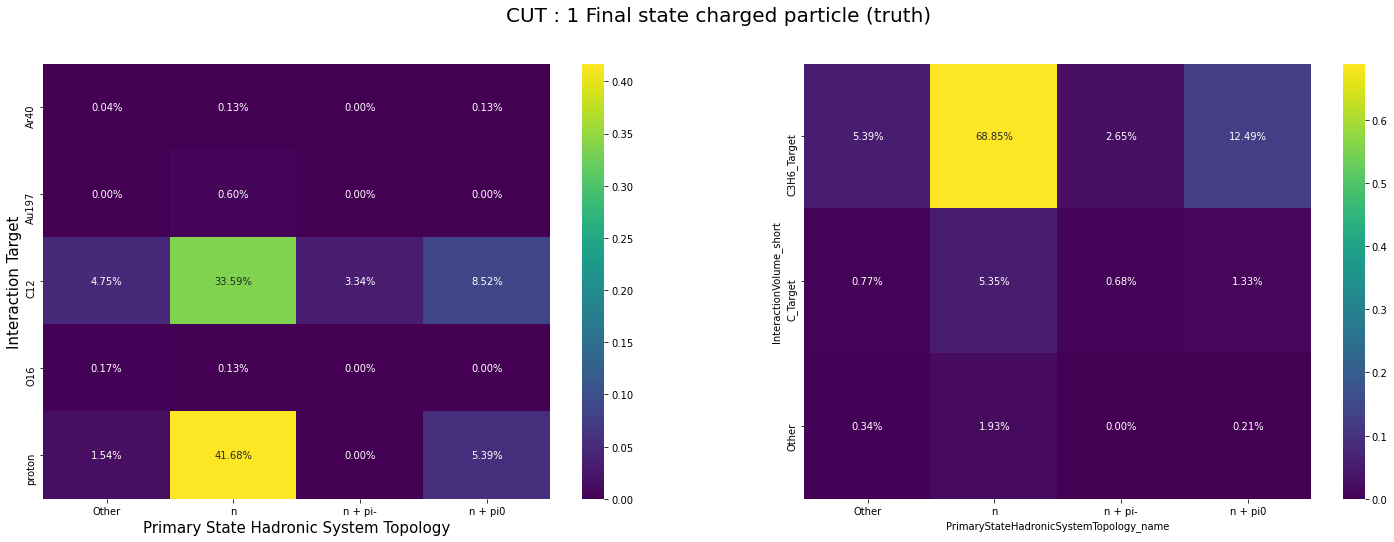

In [35]:
fig, ax = plt.subplots(1,2, figsize=(25, 8))

pivot_table_1cp = selected_events.pivot_table(
    index='InteractionTarget',
    columns='PrimaryStateHadronicSystemTopology_name',
    values='NofFinalStateChargedParticles',
    aggfunc='count',
    fill_value=0
)

pivot_table_1cp_ = selected_events.pivot_table(
    index='InteractionVolume_short',
    columns='PrimaryStateHadronicSystemTopology_name',
    values='NofFinalStateChargedParticles',
    aggfunc='count',
    fill_value=0
)

sns.heatmap(pivot_table_1cp/len(selected_events), annot=True, fmt=".2%", cmap="viridis", ax=ax[0])

sns.heatmap(pivot_table_1cp_/len(selected_events), annot=True, fmt=".2%", cmap="viridis", ax=ax[1])

plt.suptitle('CUT : 1 Final state charged particle (truth)', fontsize=20)
ax[0].set_xlabel('Primary State Hadronic System Topology', fontsize=15)
ax[0].set_ylabel('Interaction Target', fontsize=15)